<img src="https://images.unsplash.com/photo-1569154941061-e231b4725ef1?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=750&q=80" alt="airplane" style="width:450px; float:right; padding:10px; margin:0">

<h2 style='line-height:1.5em'>DATA ANALYSIS ON WORLDWIDE COMMERCIAL AIRCRAFT ACCIDENTS USING EXPLORATORY DATA ANALYSIS AND DESCRIPTIVE STATISTICS</h2>
<h4 style='line-height:1.5em'>Based on BAAA (Bureau of Aircraft Accidents Archives) Database 1918 - 2020</h4>
<p style="font-weight:bold; margin-top:28px">M. Daffa Badran Thoriq</p>

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

<h2>Import the libraries</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import statistics
from matplotlib.ticker import MaxNLocator
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import kurtosis
from scipy.stats import skew

%matplotlib inline

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

<h2>Load the Data</h2>

In [2]:
df = pd.read_csv('baaa-aircraft-dataset.csv', encoding='latin-1')

In [3]:
# Display the dataframe
df.head()

,Date,Operator,A/C Type,Location,Crew on board,Crew fatalities,PAX on board,PAX fatalities,Total on board,Total fatalities,Flight Type,Flight Phase,Continent,Probable Causes,Month,Year
0,1920-04-27,Compagnie Generale TRANSAERIENNE,Nieuport-Delage NiD-30,"The Channel, All World",1,1,0,0,1,1,Postal,Flight,Europe,Unknown Reasons,April,1920
1,1923-09-15,Armée De L'Air,Lioré-et-Olivier LeO H-13,"Mediterranean Sea, All World",0,0,0,0,0,0,Scheduled Revenue Flight,Flight,Europe,Technical Factors,September,1923
2,1924-04-24,KLM,Fokker F3,"North Sea, All World",1,1,2,2,3,3,Scheduled Revenue Flight,Flight,Europe,Technical Factors,April,1924
3,1924-08-21,Regia Aeronautica,Dornier DO J wal,"Atlantic Ocean, All World",5,0,0,0,5,0,Private,Flight,North America,Technical Factors,August,1924
4,1925-02-09,Compagnie Générale d'Enterprises Aéronatiques,Lioré-et-Olivier LeO H-13,"Mediterranean Sea, All World",2,0,0,0,2,0,Postal,Flight,Africa,Technical Factors,February,1925


In [4]:
# Get the information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592 entries, 0 to 591
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              592 non-null    object
 1   Operator          592 non-null    object
 2   A/C Type          592 non-null    object
 3   Location          592 non-null    object
 4   Crew on board     592 non-null    int64 
 5   Crew fatalities   592 non-null    int64 
 6   PAX on board      592 non-null    int64 
 7   PAX fatalities    592 non-null    int64 
 8   Total on board    592 non-null    int64 
 9   Total fatalities  592 non-null    int64 
 10  Flight Type       592 non-null    object
 11  Flight Phase      592 non-null    object
 12  Continent         592 non-null    object
 13  Probable Causes   592 non-null    object
 14  Month             592 non-null    object
 15  Year              592 non-null    int64 
dtypes: int64(7), object(9)
memory usage: 74.1+ KB


In [5]:
# Check a simple statistical describe of the data
df.describe()

,Crew on board,Crew fatalities,PAX on board,PAX fatalities,Total on board,Total fatalities,Year
count,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000
mean,5.515203,4.403716,6.084459,5.184122,11.599662,9.591216,1955.297297
std,3.949740,4.058479,22.574628,22.047516,23.945515,23.703365,20.492980
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,3.000000,1.000000,0.000000,0.000000,3.000000,1.000000,1943.000000
50%,5.000000,4.000000,0.000000,0.000000,6.000000,5.000000,1946.000000
75%,8.000000,7.000000,2.000000,1.000000,11.000000,9.000000,1967.000000
max,23.000000,22.000000,307.000000,307.000000,329.000000,329.000000,2020.000000


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

<h2>Data Preprocessing</h2>

<h4>Renaming the variable's name</h4>

In [6]:
df.rename(columns={'Date': 'date', 'Operator': 'aircraft_operators', 'A/C Type': 'aircraft_types', 
                   'Location': 'locations', 'Crew on board': 'crew_on_boards', 
                   'Crew fatalities': 'crew_fatalities', 'PAX on board': 'pax_on_boards', 
                   'PAX fatalities': 'pax_fatalities', 'Total on board': 'total_on_boards', 
                   'Total fatalities': 'total_fatalities', 'Flight Type': 'flight_types', 
                   'Flight Phase': 'flight_phases', 'Continent': 'continents', 
                   'Probable Causes': 'probable_causes', 'Month': 'month', 'Year': 'year'}, inplace=True)

df.head()

,date,aircraft_operators,aircraft_types,locations,crew_on_boards,crew_fatalities,pax_on_boards,pax_fatalities,total_on_boards,total_fatalities,flight_types,flight_phases,continents,probable_causes,month,year
0,1920-04-27,Compagnie Generale TRANSAERIENNE,Nieuport-Delage NiD-30,"The Channel, All World",1,1,0,0,1,1,Postal,Flight,Europe,Unknown Reasons,April,1920
1,1923-09-15,Armée De L'Air,Lioré-et-Olivier LeO H-13,"Mediterranean Sea, All World",0,0,0,0,0,0,Scheduled Revenue Flight,Flight,Europe,Technical Factors,September,1923
2,1924-04-24,KLM,Fokker F3,"North Sea, All World",1,1,2,2,3,3,Scheduled Revenue Flight,Flight,Europe,Technical Factors,April,1924
3,1924-08-21,Regia Aeronautica,Dornier DO J wal,"Atlantic Ocean, All World",5,0,0,0,5,0,Private,Flight,North America,Technical Factors,August,1924
4,1925-02-09,Compagnie Générale d'Enterprises Aéronatiques,Lioré-et-Olivier LeO H-13,"Mediterranean Sea, All World",2,0,0,0,2,0,Postal,Flight,Africa,Technical Factors,February,1925


<h4>Checking null values on every variable</h4>

In [7]:
df.isnull().sum()

date                  0
aircraft_operators    0
aircraft_types        0
locations             0
crew_on_boards        0
crew_fatalities       0
pax_on_boards         0
pax_fatalities        0
total_on_boards       0
total_fatalities      0
flight_types          0
flight_phases         0
continents            0
probable_causes       0
month                 0
year                  0
dtype: int64

#### Add new variables

In [8]:
df['total_survived'] = df['total_on_boards'] - df['total_fatalities']
df.shape

(592, 17)

In [9]:
df['per_month'] = df['date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'). strftime('%Y-%m'))
df.shape

(592, 18)

<h4>Removing The Accidents Data of Non-Commercial Flights</h4>

In [10]:
cond = (df['flight_types'].isin(['Scheduled Revenue Flight', 'Postal', 'Cargo', 'Charter / Taxi']))

df_com = df.loc[cond].reset_index(drop=True)

In [11]:
df_com.shape

(110, 18)

#### Removing The Rows of data which contain `Unknown Reasons` Probable Causes

In [12]:
df_com['probable_causes'].unique()

array(['Unknown Reasons', 'Technical Factors',
       'Disappeared Without Trace', 'Poor Weather', 'Human Errors',
       'Crashing The Other Objects', 'Conflict Factors'], dtype=object)

In [13]:
cond = df_com.loc[(df_com['probable_causes'] == 'Unknown Reasons')].index

df_com = df_com.drop(cond).reset_index(drop=True)

In [14]:
df_com.shape

(91, 18)

#### Variables Selection

In [15]:
df_com = df_com.drop(columns={'aircraft_operators', 'aircraft_types', 'crew_on_boards', 'crew_fatalities', 
                             'pax_on_boards', 'pax_fatalities', 'flight_phases', 'continents', 
                             'month'}, axis=1)

df_com.head()

,date,locations,total_on_boards,total_fatalities,flight_types,probable_causes,year,total_survived,per_month
0,1923-09-15,"Mediterranean Sea, All World",0,0,Scheduled Revenue Flight,Technical Factors,1923,0,1923-09
1,1924-04-24,"North Sea, All World",3,3,Scheduled Revenue Flight,Technical Factors,1924,0,1924-04
2,1925-02-09,"Mediterranean Sea, All World",2,0,Postal,Technical Factors,1925,2,1925-02
3,1925-04-11,"Mediterranean Sea, All World",2,0,Postal,Technical Factors,1925,2,1925-04
4,1925-04-14,"Mediterranean Sea, All World",2,0,Postal,Technical Factors,1925,2,1925-04


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Descriptive Statistics

### Describing Variables with `Quantitative Data Type`

<h4>1. Measures of Frequency</h4>

##### **Year Variable**

In [16]:
year = df_com['year'].value_counts().reset_index()
year.rename(columns={'index': 'year', 'year': 'frequency'}, inplace=True)
year = year.sort_values(['year'], ascending=True)
year = year.reset_index(drop=True)
year.head()

,year,frequency
0,1923,1
1,1924,1
2,1925,4
3,1926,2
4,1929,3


Text(0, 0.5, 'Frequencies')

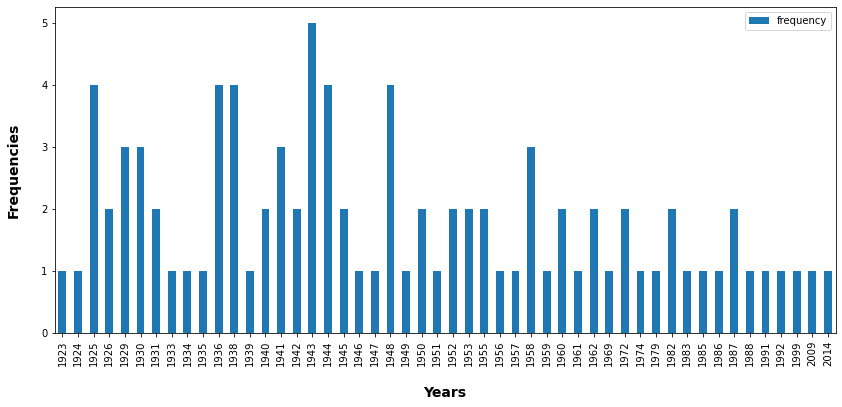

In [17]:
year.plot(kind='bar', x='year', y='frequency', figsize=(14,6))
plt.xlabel('Years', fontsize=14, labelpad=20, fontweight='bold')
plt.ylabel('Frequencies', fontsize=14, labelpad=20, fontweight='bold')

##### **Total on Board Variable**

In [18]:
tot_on_board = df_com['total_on_boards'].value_counts().reset_index()
tot_on_board.rename(columns={'index': 'total_on_boards', 'total_on_boards': 'frequency'}, inplace=True)
tot_on_board = tot_on_board.sort_values(['total_on_boards'], ascending=True)
tot_on_board = tot_on_board.reset_index(drop=True)
tot_on_board.head()

,total_on_boards,frequency
0,0,2
1,1,1
2,2,10
3,3,15
4,4,7


Text(0, 0.5, 'Frequencies')

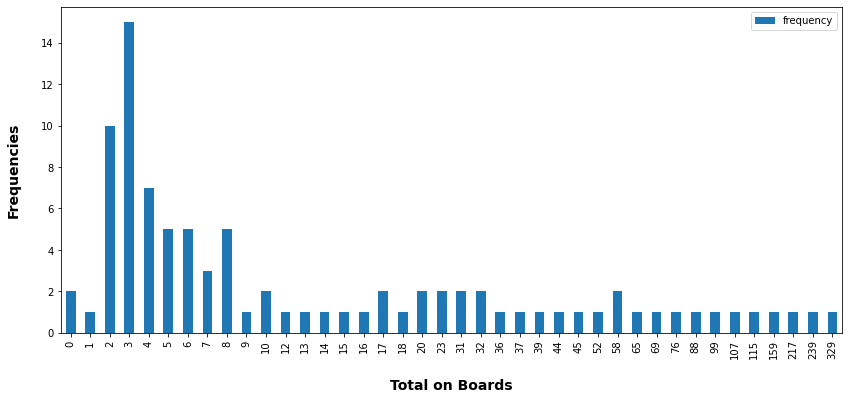

In [19]:
tot_on_board.plot(kind='bar', x='total_on_boards', y='frequency', figsize=(14,6))
plt.xlabel('Total on Boards', fontsize=14, labelpad=20, fontweight='bold')
plt.ylabel('Frequencies', fontsize=14, labelpad=20, fontweight='bold')

##### **Total Fatalities Variable**

In [20]:
tot_fatalities = df_com['total_fatalities'].value_counts().reset_index()
tot_fatalities.rename(columns={'index': 'total_fatalities', 'total_fatalities': 'frequency'}, inplace=True)
tot_fatalities = tot_fatalities.sort_values(['total_fatalities'], ascending=True)
tot_fatalities = tot_fatalities.reset_index(drop=True)
tot_fatalities.head()

,total_fatalities,frequency
0,0,22
1,1,3
2,2,5
3,3,11
4,4,5


Text(0, 0.5, 'Frequencies')

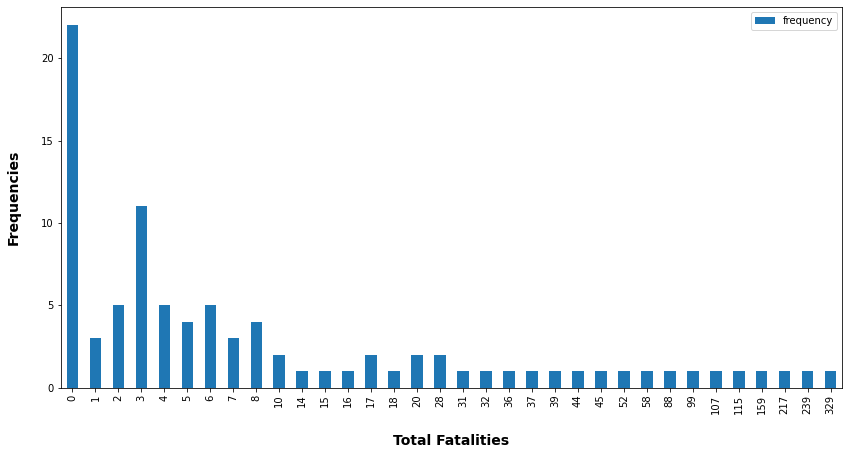

In [21]:
tot_fatalities.plot(kind='bar', x='total_fatalities', y='frequency', figsize=(14,7))
plt.xlabel('Total Fatalities', fontsize=14, labelpad=20, fontweight='bold')
plt.ylabel('Frequencies', fontsize=14, labelpad=20, fontweight='bold')

##### **Total survived Variable**

In [22]:
tot_survived = df_com['total_survived'].value_counts().reset_index()
tot_survived.rename(columns={'index': 'total_survived', 'total_survived': 'frequency'}, inplace=True)
tot_survived = tot_survived.sort_values(['total_survived'], ascending=True)
tot_survived = tot_survived.reset_index(drop=True)
tot_survived.head()

,total_survived,frequency
0,0,64
1,2,6
2,3,6
3,4,3
4,7,1


Text(0, 0.5, 'Frequencies')

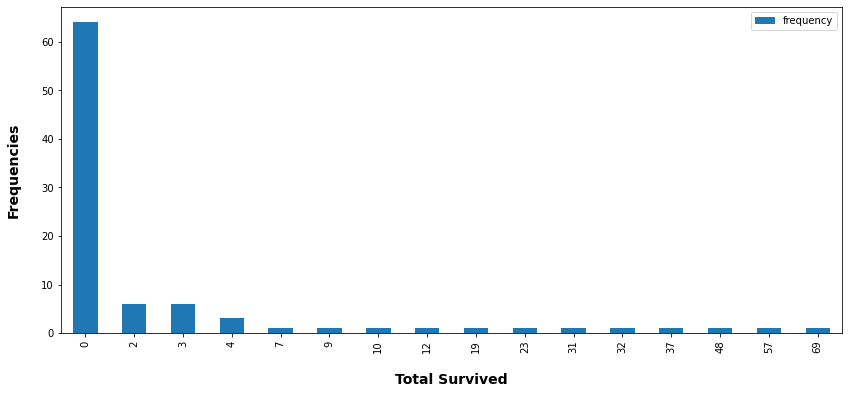

In [23]:
tot_survived.plot(kind='bar', x='total_survived', y='frequency', figsize=(14,6))
plt.xlabel('Total Survived', fontsize=14, labelpad=20, fontweight='bold')
plt.ylabel('Frequencies', fontsize=14, labelpad=20, fontweight='bold')

#### 2. Measure of Central Tendency

##### **Year Variable** 

In [24]:
# Median
year_med = df_com['year'].median()
print("The median of year variable : ", year_med)

# Mean
year_mean = df_com['year'].mean()
print("The mean of year variable : ", year_mean)

# Mode
year_mode = df_com['year'].mode()
print("The mode of year variable : ", year_mode)

The median of year variable :  1945.0
The mean of year variable :  1951.098901098901
The mode of year variable :  0    1943
dtype: int64


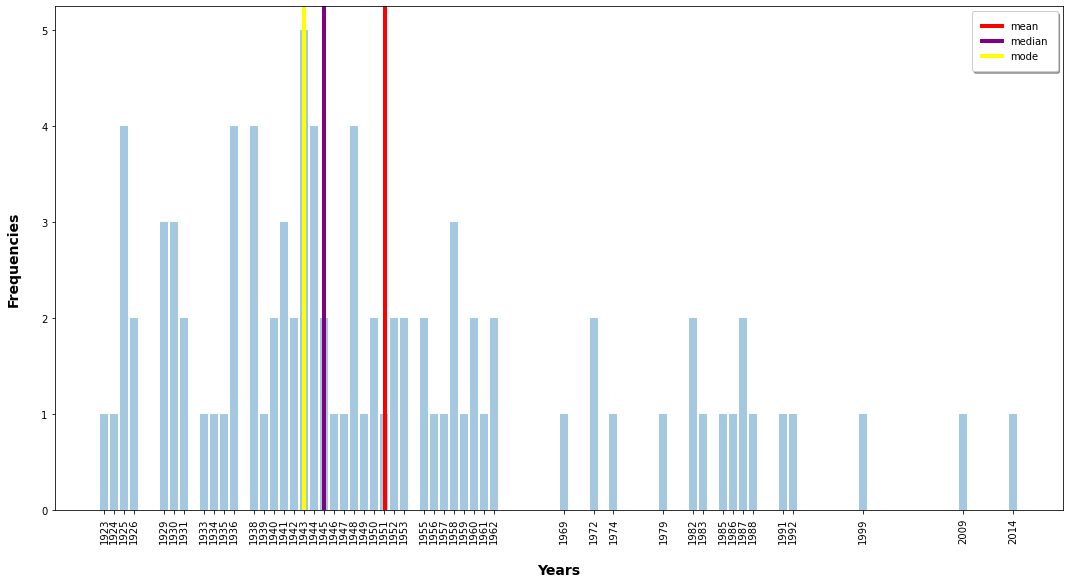

In [25]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_axes([1,1,1,1])
plt.bar(year['year'], year['frequency'], alpha=0.4)

ax.axvline(year_mean, color="red", linewidth=4, label="mean", ymin=0, ymax=1.00)
ax.axvline(year_med, color="purple", linewidth=4, label="median", ymin=0, ymax=1.00)
ax.axvline(1943, color="yellow", linewidth=4, label="mode", ymin=0, ymax=1.00)

plt.xlabel('Years', fontsize=14, labelpad=20, fontweight='bold')
plt.ylabel('Frequencies', fontsize=14, labelpad=20, fontweight='bold')

plt.xticks(year['year'])
plt.tick_params(axis="x", rotation=90)

leg = ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()

##### **Total on Board Variable**

In [26]:
# Median
tot_on_board_med = df_com['total_on_boards'].median()
print("The median of total on boards variable : ", tot_on_board_med)

# Mean
tot_on_board_mean = df_com['total_on_boards'].mean()
print("The mean of total on boards variable : ", tot_on_board_mean)

# Mode
tot_on_board_mode = df_com['total_on_boards'].mode()
print("The mode of total on boards variable : ", tot_on_board_mode)

The median of total on boards variable :  7.0
The mean of total on boards variable :  27.52747252747253
The mode of total on boards variable :  0    3
dtype: int64


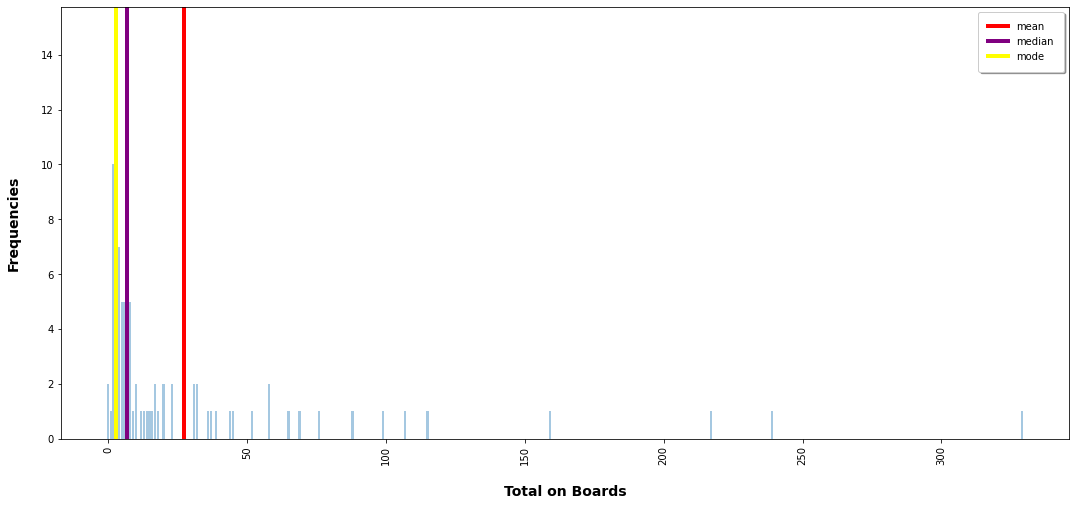

In [27]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_axes([1,1,1,1])
plt.bar(tot_on_board['total_on_boards'], tot_on_board['frequency'], alpha=0.4)

ax.axvline(tot_on_board_mean, color="red", linewidth=4, label="mean", ymin=0, ymax=1.00)
ax.axvline(tot_on_board_med, color="purple", linewidth=4, label="median", ymin=0, ymax=1.00)
ax.axvline(3, color="yellow", linewidth=4, label="mode", ymin=0, ymax=1.00)

plt.xlabel('Total on Boards', fontsize=14, labelpad=20, fontweight='bold')
plt.ylabel('Frequencies', fontsize=14, labelpad=20, fontweight='bold')

# plt.xticks(tot_on_board['total_on_boards'])
plt.tick_params(axis="x", rotation=90)

leg = ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()

##### **Total Fatalities Variable**

In [28]:
# Median
tot_fat_med = df_com['total_fatalities'].median()
print("The median of total fatalities variable : ", tot_fat_med)

# Mean
tot_fat_mean = df_com['total_fatalities'].mean()
print("The mean of total fatalities variable : ", tot_fat_mean)

# Mode
tot_fat_mode = df_com['total_fatalities'].mode()
print("The mode of total fatalities variable : ", tot_fat_mode)

The median of total fatalities variable :  4.0
The mean of total fatalities variable :  23.175824175824175
The mode of total fatalities variable :  0    0
dtype: int64


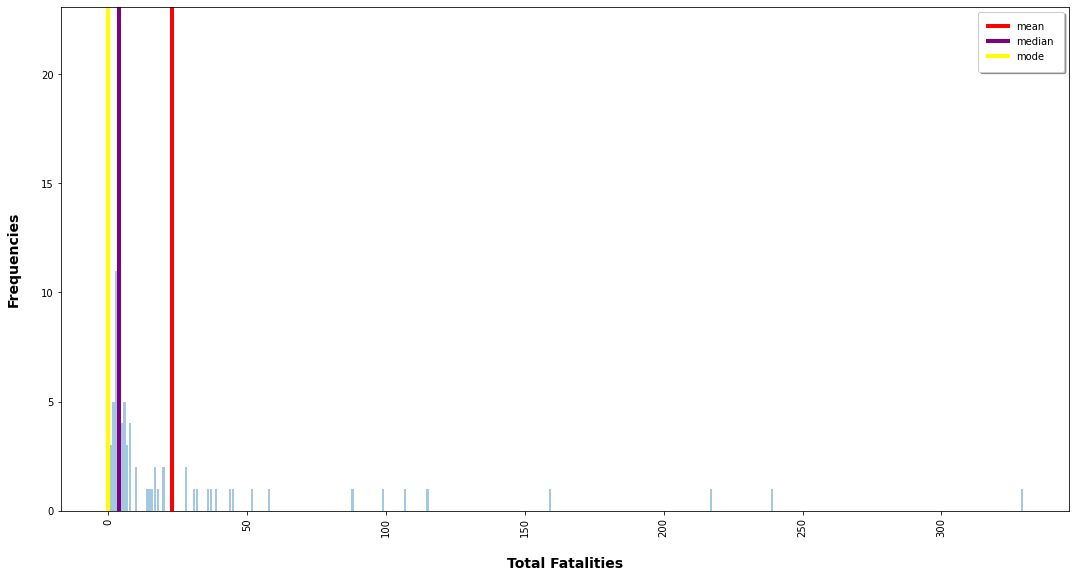

In [29]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_axes([1,1,1,1])
plt.bar(tot_fatalities['total_fatalities'], tot_fatalities['frequency'], alpha=0.4)

ax.axvline(tot_fat_mean, color="red", linewidth=4, label="mean", ymin=0, ymax=1.00)
ax.axvline(tot_fat_med, color="purple", linewidth=4, label="median", ymin=0, ymax=1.00)
ax.axvline(0, color="yellow", linewidth=4, label="mode", ymin=0, ymax=1.00)

plt.xlabel('Total Fatalities', fontsize=14, labelpad=20, fontweight='bold')
plt.ylabel('Frequencies', fontsize=14, labelpad=20, fontweight='bold')

# plt.xticks(tot_on_board['total_on_boards'])
plt.tick_params(axis="x", rotation=90)

leg = ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()

##### **Total Survived Variable**

In [30]:
# Median
tot_survived_med = df_com['total_survived'].median()
print("The median of total survived variable : ", tot_survived_med)

# Mean
tot_survived_mean = df_com['total_survived'].mean()
print("The mean of total survived variable : ", tot_survived_mean)

# Mode
tot_survived_mode = df_com['total_survived'].mode()
print("The mode of total survived variable : ", tot_survived_mode)

The median of total survived variable :  0.0
The mean of total survived variable :  4.351648351648351
The mode of total survived variable :  0    0
dtype: int64


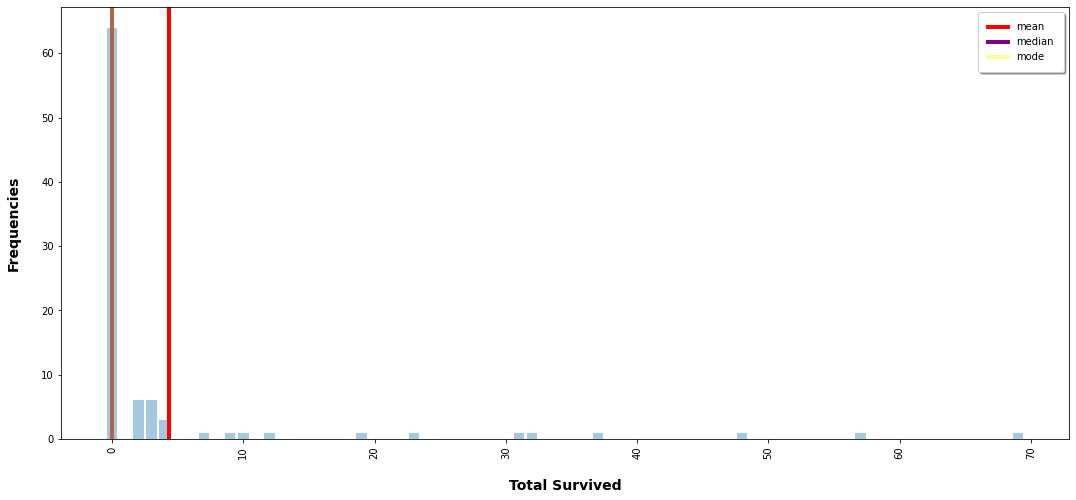

In [31]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_axes([1,1,1,1])
plt.bar(tot_survived['total_survived'], tot_survived['frequency'], alpha=0.4)

ax.axvline(tot_survived_mean, color="red", linewidth=4, label="mean", ymin=0, ymax=1.00)
ax.axvline(tot_survived_med, color="purple", linewidth=4, label="median", ymin=0, ymax=1.00)
ax.axvline(0, color="yellow", linewidth=4, label="mode", ymin=0, ymax=1.00, alpha=0.4)

plt.xlabel('Total Survived', fontsize=14, labelpad=20, fontweight='bold')
plt.ylabel('Frequencies', fontsize=14, labelpad=20, fontweight='bold')

# plt.xticks(tot_on_board['total_on_boards'])
plt.tick_params(axis="x", rotation=90)

leg = ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()

#### 3. Measure of Dispersion

##### **Year Variable**

In [32]:
# Max Values
year_max = df_com['year'].max()
print("Max Value : {}".format(year_max))

# Min Values
year_min = df_com['year'].min()
print("Min Value : {}".format(year_min))

# Range
year_range = year_max - year_min
print("Range : {}".format(year_range))

# Calculating Q1
q1 = np.percentile(df_com['year'], 25)
print("Quartile1 : {}".format(q1))

# Calculating Q2
q2 = np.percentile(df_com['year'], 50)
print("Quartile2 : {}".format(q2))

# Calculating Q3
q3 = np.percentile(df_com['year'], 75)
print("Quartile3 : {}".format(q3))

# Calculating IQR
IQR = q3 - q1
print("IQR : {}".format(IQR))

# Calculating Min Q0 (MINIMUM)
q0 = q1 - (1.5 * IQR)
print("Minimum Value (Q0) : {}".format(q0))

# Calculating Min Q4 (MAXIMUM)
q4 = q3 + (1.5 * IQR)
print("Maximum Value (Q4) : {}".format(q4))

# Calculating Sample Variance
year_var = statistics.pvariance(df_com['year'])
print('Population Variance : {}'.format(year_var))

# Calculating Standard Deviation
year_std = statistics.pstdev(df_com['year'])
print("Population Standard Deviation : {}".format(year_std))

Max Value : 2014
Min Value : 1923
Range : 91
Quartile1 : 1937.0
Quartile2 : 1945.0
Quartile3 : 1959.5
IQR : 22.5
Minimum Value (Q0) : 1903.25
Maximum Value (Q4) : 1993.25
Population Variance : 423.6056031880208
Population Standard Deviation : 20.58168125270676


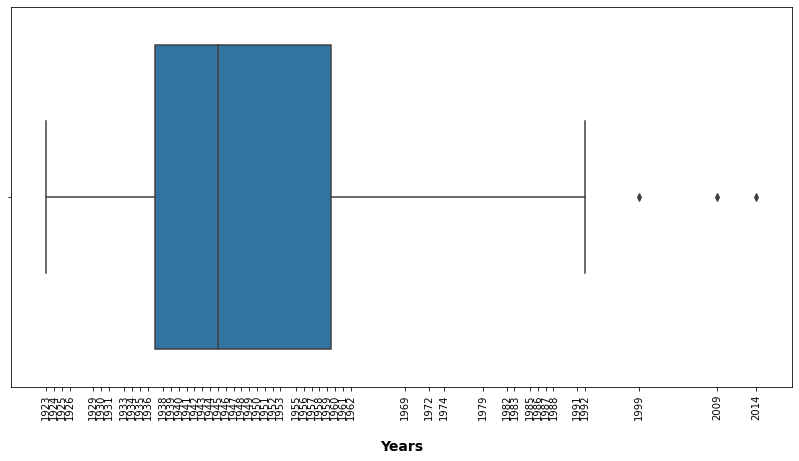

In [33]:
plt.figure(figsize=(14,7))
sns.boxplot(x=df_com['year'])
plt.xlabel('Years', fontsize=14, labelpad=20, fontweight="bold")
plt.tick_params(axis="x", rotation=90)
plt.xticks(year['year'])
plt.show()

##### **Total on Board Variable**

In [34]:
# Max Values
tot_on_board_max = df_com['total_on_boards'].max()
print("Max Value : {}".format(tot_on_board_max))

# Min Values
tot_on_board_min = df_com['total_on_boards'].min()
print("Min Value : {}".format(tot_on_board_min))

# Range
tot_on_board_range = tot_on_board_max - tot_on_board_min
print("Range : {}".format(tot_on_board_range))

# Calculating Q1
q1 = np.percentile(df_com['total_on_boards'], 25)
print("Quartile1 : {}".format(q1))

# Calculating Q2
q2 = np.percentile(df_com['total_on_boards'], 50)
print("Quartile2 : {}".format(q2))

# Calculating Q3
q3 = np.percentile(df_com['total_on_boards'], 75)
print("Quartile3 : {}".format(q3))

# Calculating IQR
IQR = q3 - q1
print("IQR : {}".format(IQR))

# Calculating Min Q0 (MINIMUM)
q0 = q1 - (1.5 * IQR)
print("Minimum Value (Q0) : {}".format(q0))

# Calculating Min Q4 (MAXIMUM)
q4 = q3 + (1.5 * IQR)
print("Maximum Value (Q4) : {}".format(q4))

# Calculating Sample Variance
tot_on_board_var = statistics.pvariance(df_com['total_on_boards'])
print('Population Variance : {}'.format(tot_on_board_var))

# Calculating Standard Deviation
tot_on_board_std = statistics.pstdev(df_com['total_on_boards'])
print("Population Standard Deviation : {}".format(tot_on_board_std))

Max Value : 329
Min Value : 0
Range : 329
Quartile1 : 3.0
Quartile2 : 7.0
Quartile3 : 27.0
IQR : 24.0
Minimum Value (Q0) : -33.0
Maximum Value (Q4) : 63.0
Population Variance : 2773.5899046008935
Population Standard Deviation : 52.66488303035423


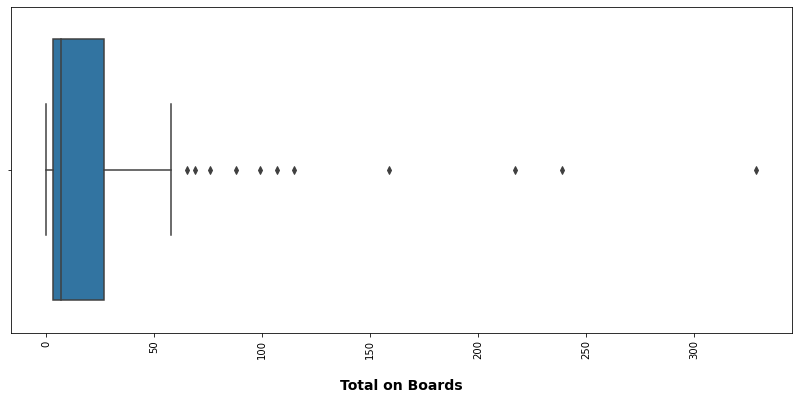

In [35]:
plt.figure(figsize=(14,6))
sns.boxplot(x=df_com['total_on_boards'])
plt.xlabel('Total on Boards', fontsize=14, labelpad=20, fontweight="bold")
plt.tick_params(axis="x", rotation=90)
plt.show()

##### **Total Fatalities Variable**

In [36]:
# Max Values
tot_fat_max = df_com['total_fatalities'].max()
print("Max Value : {}".format(tot_fat_max))

# Min Values
tot_fat_min = df_com['total_fatalities'].min()
print("Min Value : {}".format(tot_fat_min))

# Range
tot_fat_range = tot_fat_max - tot_fat_min
print("Range : {}".format(tot_fat_range))

# Calculating Q1
q1 = np.percentile(df_com['total_fatalities'], 25)
print("Quartile1 : {}".format(q1))

# Calculating Q2
q2 = np.percentile(df_com['total_fatalities'], 50)
print("Quartile2 : {}".format(q2))

# Calculating Q3
q3 = np.percentile(df_com['total_fatalities'], 75)
print("Quartile3 : {}".format(q3))

# Calculating IQR
IQR = q3 - q1
print("IQR : {}".format(IQR))

# Calculating Min Q0 (MINIMUM)
q0 = q1 - (1.5 * IQR)
print("Minimum Value (Q0) : {}".format(q0))

# Calculating Min Q4 (MAXIMUM)
q4 = q3 + (1.5 * IQR)
print("Maximum Value (Q4) : {}".format(q4))

# Calculating Sample Variance
tot_fat_var = statistics.pvariance(df_com['total_fatalities'])
print('Population Variance : {}'.format(tot_fat_var))

# Calculating Standard Deviation
tot_fat_std = statistics.pstdev(df_com['total_fatalities'])
print("Population Standard Deviation : {}".format(tot_fat_std))

Max Value : 329
Min Value : 0
Range : 329
Quartile1 : 1.0
Quartile2 : 4.0
Quartile3 : 17.0
IQR : 16.0
Minimum Value (Q0) : -23.0
Maximum Value (Q4) : 41.0
Population Variance : 2772.5844704745805
Population Standard Deviation : 52.655336581153676


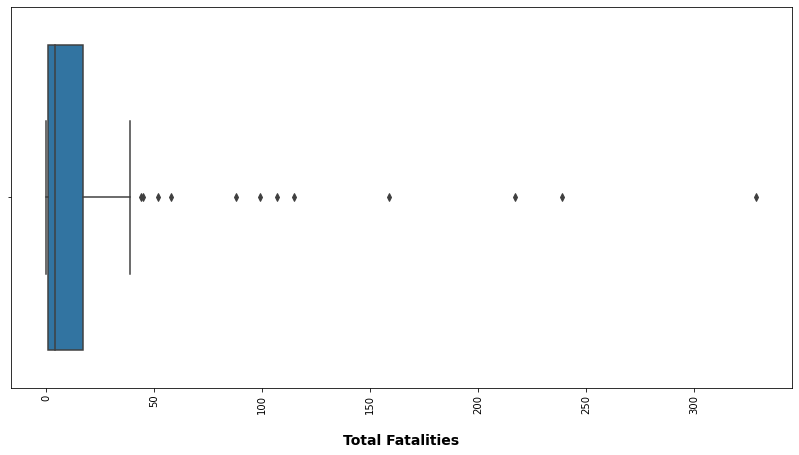

In [37]:
plt.figure(figsize=(14,7))
sns.boxplot(x=df_com['total_fatalities'])
plt.xlabel('Total Fatalities', fontsize=14, labelpad=20, fontweight="bold")
plt.tick_params(axis="x", rotation=90)
plt.savefig('assets/images/total_fatalities_dispersion.png')
plt.show()

##### **Total Survived Variable**

In [38]:
# Max Values
tot_survived_max = df_com['total_survived'].max()
print("Max Value : {}".format(tot_survived_max))

# Min Values
tot_survived_min = df_com['total_survived'].min()
print("Min Value : {}".format(tot_survived_min))

# Range
tot_survived_range = tot_survived_max - tot_survived_min
print("Range : {}".format(tot_survived_range))

# Calculating Q1
q1 = np.percentile(df_com['total_survived'], 25)
print("Quartile1 : {}".format(q1))

# Calculating Q2
q2 = np.percentile(df_com['total_survived'], 50)
print("Quartile2 : {}".format(q2))

# Calculating Q3
q3 = np.percentile(df_com['total_survived'], 75)
print("Quartile3 : {}".format(q3))

# Calculating IQR
IQR = q3 - q1
print("IQR : {}".format(IQR))

# Calculating Min Q0 (MINIMUM)
q0 = q1 - (1.5 * IQR)
print("Minimum Value (Q0) : {}".format(q0))

# Calculating Min Q4 (MAXIMUM)
q4 = q3 + (1.5 * IQR)
print("Maximum Value (Q4) : {}".format(q4))

# Calculating Sample Variance
tot_survived_var = statistics.pvariance(df_com['total_survived'])
print('Population Variance : {}'.format(tot_survived_var))

# Calculating Standard Deviation
tot_survived_std = statistics.pstdev(df_com['total_survived'])
print("Population Standard Deviation : {}".format(tot_survived_std))

Max Value : 69
Min Value : 0
Range : 69
Quartile1 : 0.0
Quartile2 : 0.0
Quartile3 : 2.0
IQR : 2.0
Minimum Value (Q0) : -3.0
Maximum Value (Q4) : 5.0
Population Variance : 146.53568409612367
Population Standard Deviation : 12.105192443580716


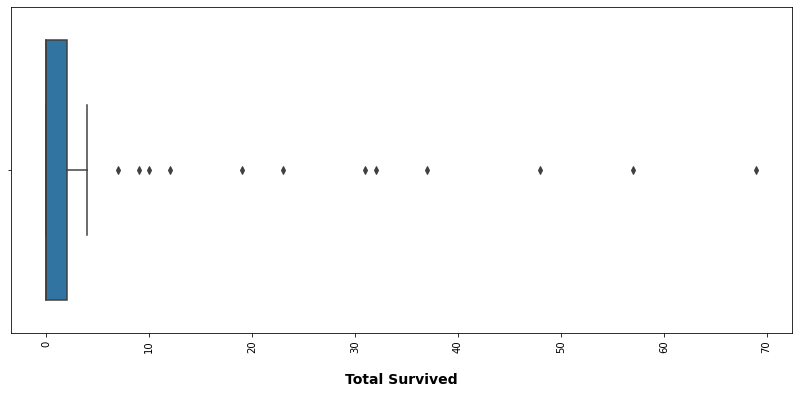

In [39]:
plt.figure(figsize=(14,6))
sns.boxplot(x=df_com['total_survived'])
plt.xlabel('Total Survived', fontsize=14, labelpad=20, fontweight="bold")
plt.tick_params(axis="x", rotation=90)
plt.savefig('assets/images/total_survived_dispersion.png')
plt.show()

#### 4. Skewness and Kurtosis

##### **Year Variable**

In [40]:
skew(df_com['year'], bias=False)

1.0147886130682993

In [41]:
kurtosis(df_com['year'], bias=False)

0.5182907184718726

##### **Total on Board Variable**

In [42]:
skew(df_com['total_on_boards'], bias=False)

3.615826221829018

In [43]:
kurtosis(df_com['total_on_boards'], bias=False)

15.04373188408109

##### **Total Fatalities Variable**

In [44]:
skew(df_com['total_fatalities'], bias=False)

3.830649993112843

In [45]:
kurtosis(df_com['total_fatalities'], bias=False)

16.324597066769996

##### **Total Survived Variable**

In [46]:
skew(df_com['total_survived'], bias=False)

3.648270078209161

In [47]:
kurtosis(df_com['total_survived'], bias=False)

13.777918130655635

### Describing Variables with `Qualitative Data Type`

#### 1. Frequency Distribution

##### Flight Types Variable

Text(0, 0.5, 'Frequency')

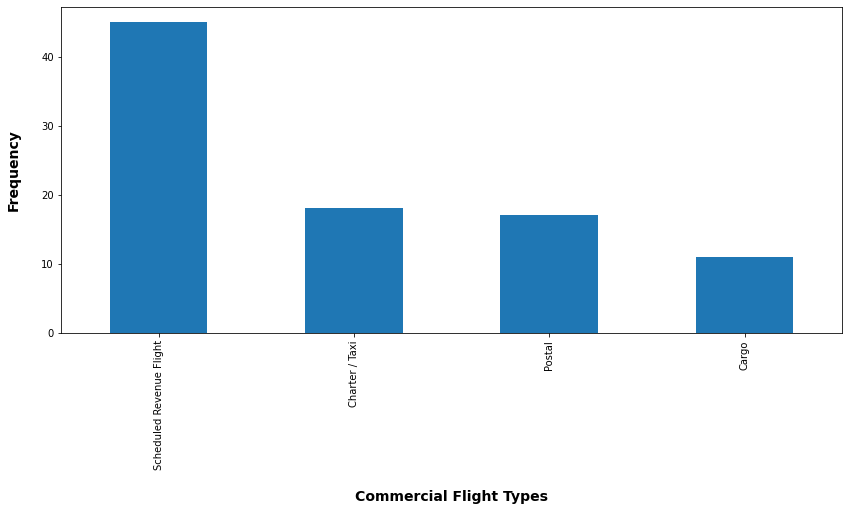

In [48]:
df_com['flight_types'].value_counts().plot(kind='bar', figsize=(14,6))
plt.xlabel('Commercial Flight Types', labelpad=20, fontweight='bold', fontsize=14)
plt.ylabel('Frequency', labelpad=20, fontweight='bold', fontsize=14)

##### **Probable Causes Variable**

Text(0, 0.5, 'Frequency')

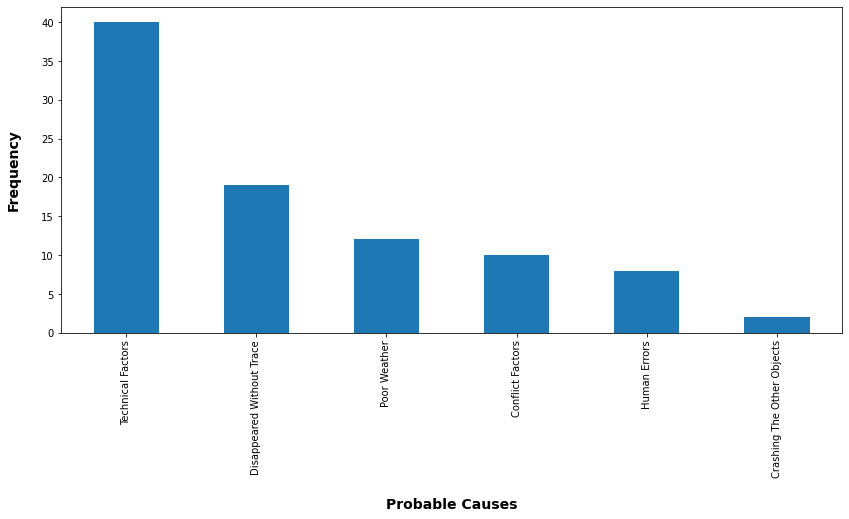

In [49]:
df_com['probable_causes'].value_counts().plot(kind='bar', figsize=(14,6))
plt.xlabel('Probable Causes',labelpad=20, fontweight='bold', fontsize=14)
plt.ylabel('Frequency', labelpad=20, fontweight='bold', fontsize=14)

#### 2. Percentage 

##### **Flight Types Variable**

In [50]:
df_flight_types = df_com['flight_types'].value_counts().reset_index()
df_flight_types.rename(columns={'index': 'flight_types', 'flight_types': 'frequency'}, inplace=True)
df_flight_types['percentage'] = (df_flight_types['frequency'] / df_flight_types['frequency'].sum()) * 100
df_flight_types

,flight_types,frequency,percentage
0,Scheduled Revenue Flight,45,49.450549
1,Charter / Taxi,18,19.780220
2,Postal,17,18.681319
3,Cargo,11,12.087912


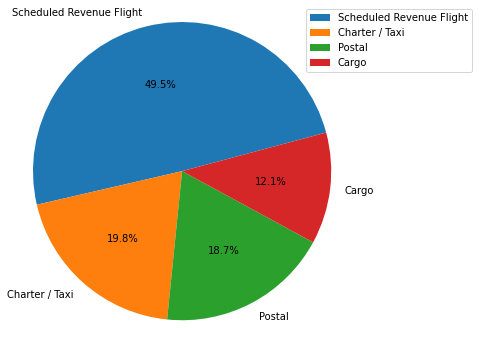

In [51]:
# Visualize using pie chart
plt.figure(figsize=(6,6))
plt.pie(df_flight_types['percentage'], labels=df_flight_types['flight_types'], autopct='%1.1f%%', startangle=15)
plt.legend(loc=(0.875,0.80))
plt.axis('equal')
plt.show()

##### **Probable Causes Variable**

In [52]:
df_prob_causes = df_com['probable_causes'].value_counts().reset_index()
df_prob_causes.rename(columns={'index': 'probable_causes', 'probable_causes': 'frequency'}, inplace=True)
df_prob_causes['percentage'] = (df_prob_causes['frequency'] / df_prob_causes['frequency'].sum()) * 100
df_prob_causes

,probable_causes,frequency,percentage
0,Technical Factors,40,43.956044
1,Disappeared Without Trace,19,20.879121
2,Poor Weather,12,13.186813
3,Conflict Factors,10,10.989011
4,Human Errors,8,8.791209
5,Crashing The Other Objects,2,2.197802


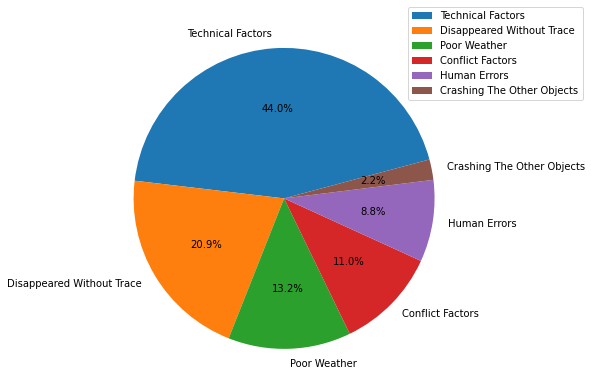

In [53]:
# Visualize using pie chart
plt.figure(figsize=(6,6))
plt.pie(df_prob_causes['percentage'], labels=df_prob_causes['probable_causes'], autopct='%1.1f%%', startangle=15)
plt.legend(loc=(0.875,0.80))
plt.axis('equal')
plt.show()

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Exploratory Data Analysis (EDA)

### 1. Number of Accidents per Year from (1918 - 2020)

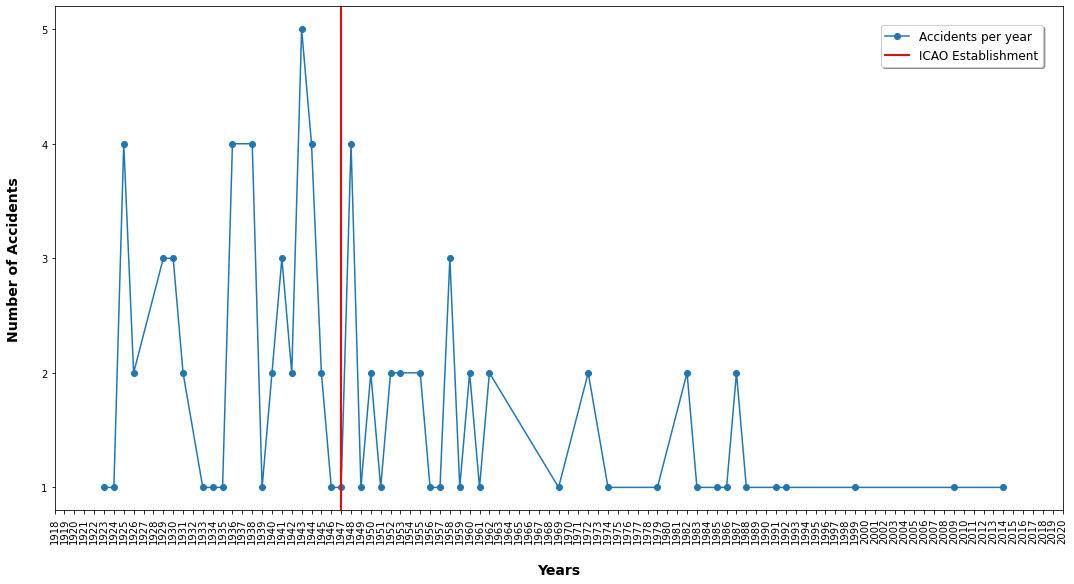

In [54]:
# Visualize the number of accidents per year before and after ICAO Establishment

fig = plt.figure(figsize=(14,7))
ax= fig.add_axes([1,1,1,1])
plt.plot(year['year'], year['frequency'], label='Accidents per year', marker='o')
ax.axvline(1947, color="red", linewidth=2, label="ICAO Establishment", ymin=0, ymax=1.00, alpha=1)
plt.xlabel('Years', labelpad=20, fontsize=14, fontweight='bold')
plt.ylabel('Number of Accidents', labelpad=20, fontsize=14, fontweight='bold')

plt.yticks(range(1,6))
plt.xticks(range(1918, 2021))
plt.tick_params(axis='x', rotation=90)
plt.legend(loc='upper center', fontsize=12, bbox_to_anchor=(0.9,0.975), shadow=True, ncol=1)
plt.show()

### 2. Number of Fatalities per Year from (1918 - 2020)

In [55]:
fat_per_year = df_com.groupby('year')['total_fatalities'].sum().reset_index()
fat_per_year.head()

,year,total_fatalities
0,1923,0
1,1924,3
2,1925,0
3,1926,1
4,1929,0


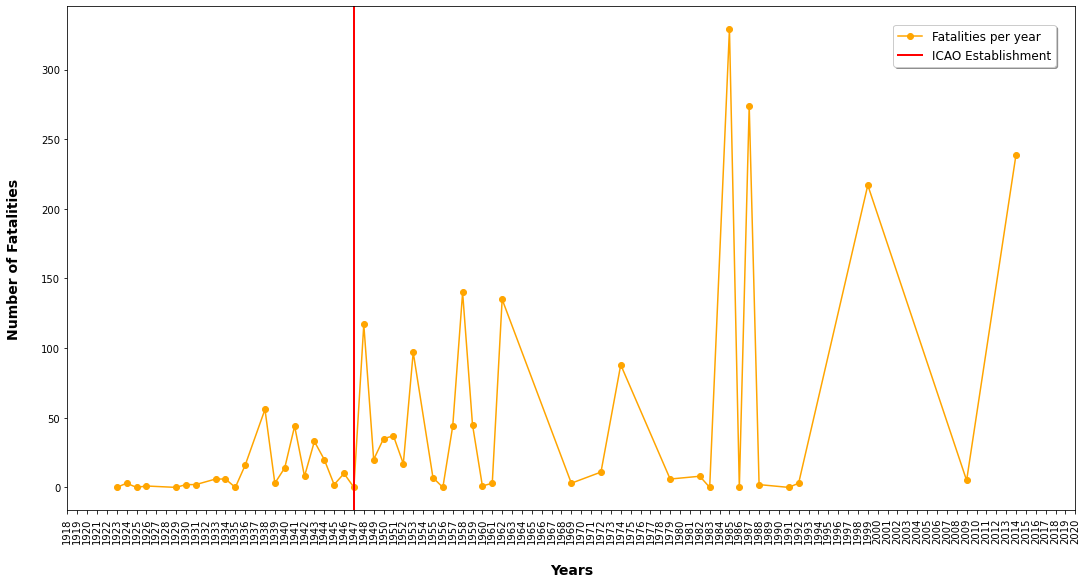

In [56]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_axes([1,1,1,1])
plt.plot(fat_per_year['year'], fat_per_year['total_fatalities'], label='Fatalities per year', marker='o', color='orange')
ax.axvline(1947, color='red', linewidth=2, label='ICAO Establishment', ymin=0, ymax=1.00, alpha=1)
plt.xlabel('Years', labelpad=20, fontsize=14, fontweight='bold')
plt.ylabel('Number of Fatalities', labelpad=20, fontsize=14, fontweight='bold')
plt.tick_params(axis='x', rotation=90)
plt.xticks(range(1918, 2021))
plt.legend(loc='upper center', bbox_to_anchor=(0.90, 0.975), shadow=True, ncol=1, fontsize=12)
plt.show()

### 3. Comparison between Number of Accidents and Fatalities per Year from (1918-2020)

In [57]:
fat_acc_per_year = df_com.groupby('year')['total_fatalities'].agg({'sum', 'count'}).reset_index()
fat_acc_per_year.head()

,year,count,sum
0,1923,1,0
1,1924,1,3
2,1925,4,0
3,1926,2,1
4,1929,3,0


In [58]:
scaler = MinMaxScaler()
X = fat_acc_per_year.iloc[:, 1:]
X_scaler = scaler.fit_transform(X)
df_scaler = pd.DataFrame(data=X_scaler, columns=['number_of_fatalities', 'number_of_accidents'])
df_scaler.head()

,number_of_fatalities,number_of_accidents
0,0.00,0.000000
1,0.00,0.009119
2,0.75,0.000000
3,0.25,0.003040
4,0.50,0.000000


In [59]:
scaler_fat_acc_per_year = pd.concat([fat_acc_per_year.iloc[:, 0], df_scaler], axis=1)
scaler_fat_acc_per_year.head()

,year,number_of_fatalities,number_of_accidents
0,1923,0.00,0.000000
1,1924,0.00,0.009119
2,1925,0.75,0.000000
3,1926,0.25,0.003040
4,1929,0.50,0.000000


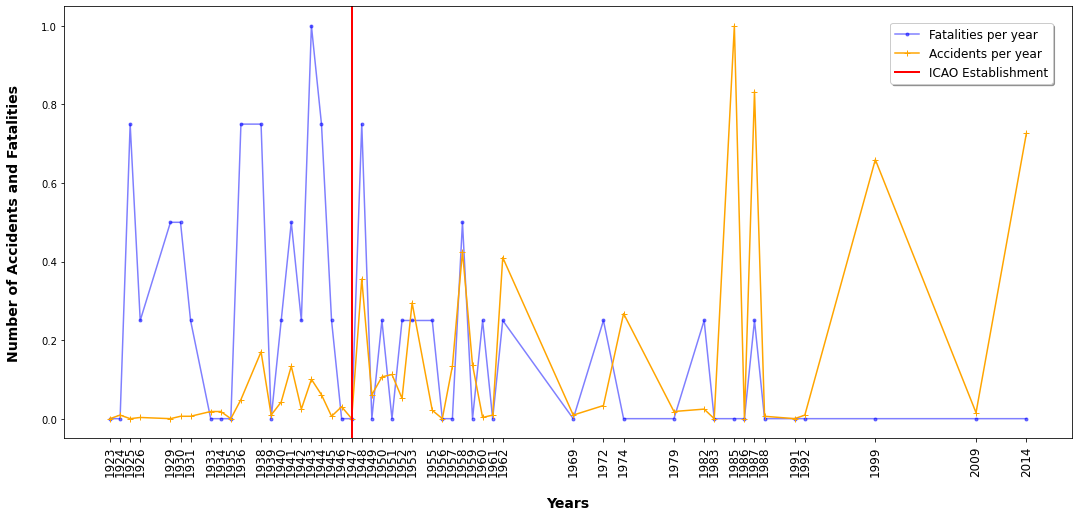

In [60]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_axes([1,1,1,1])
plt.plot(scaler_fat_acc_per_year['year'], scaler_fat_acc_per_year['number_of_fatalities'], marker='.', color='blue', label='Fatalities per year', alpha=0.5)
plt.plot(scaler_fat_acc_per_year['year'], scaler_fat_acc_per_year['number_of_accidents'], marker='+', color='orange', label='Accidents per year', alpha=1)
ax.axvline(1947, color='red', linewidth=2, label='ICAO Establishment', ymin=0, ymax=1.00, alpha=1)
plt.xlabel('Years', labelpad=20, fontsize=14, fontweight='bold')
plt.ylabel('Number of Accidents and Fatalities', labelpad=20, fontsize=14, fontweight='bold')
plt.tick_params(axis='x', rotation=90)
plt.xticks(fat_per_year['year'], fontsize=12)
plt.legend(loc='upper center', bbox_to_anchor=(0.90, 0.975), shadow=True, ncol=1, fontsize=12)
plt.show()

### 4. Number of Accidents per Year from (1918-2020) by Probable Causes

### **A.** Conflict Factors

In [61]:
conflict_factors = df_com.loc[df_com['probable_causes'] == 'Conflict Factors'].reset_index(drop=True)
conflict_factors.head()

,date,locations,total_on_boards,total_fatalities,flight_types,probable_causes,year,total_survived,per_month
0,1940-11-27,"Mediterranean Sea, All World",6,6,Postal,Conflict Factors,1940,0,1940-11
1,1942-11-15,"Mediterranean Sea, All World",4,4,Scheduled Revenue Flight,Conflict Factors,1942,0,1942-11
2,1942-11-23,"Mediterranean Sea, All World",4,4,Scheduled Revenue Flight,Conflict Factors,1942,0,1942-11
3,1943-04-10,"Mediterranean Sea, All World",3,3,Scheduled Revenue Flight,Conflict Factors,1943,0,1943-04
4,1943-04-13,"Mediterranean Sea, All World",3,3,Scheduled Revenue Flight,Conflict Factors,1943,0,1943-04


In [62]:
df_conflict_factors = conflict_factors.groupby('year')['total_fatalities'].agg({'sum', 'count'}).reset_index()
df_conflict_factors.rename(columns={'sum': 'total_fatalities', 'count': 'total_accidents'}, inplace=True)
df_conflict_factors.head()

,year,total_accidents,total_fatalities
0,1940,1,6
1,1942,2,8
2,1943,5,33
3,1944,1,3
4,1987,1,115


#### `Number of Accidents` per Year by Conflict Factors

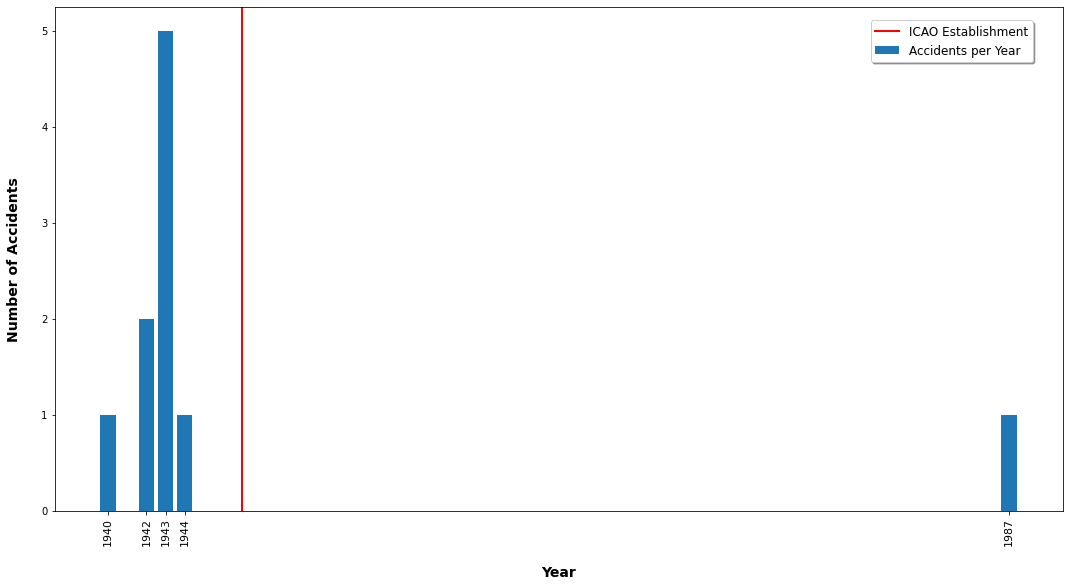

In [63]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_axes([1,1,1,1])
plt.bar(df_conflict_factors['year'], df_conflict_factors['total_accidents'], label='Accidents per Year')
ax.axvline(1947, color='red', linewidth=2, label='ICAO Establishment', ymin=0, ymax=1, alpha=1)
plt.xlabel('Year', labelpad=20, fontsize=14, fontweight='bold')
plt.ylabel('Number of Accidents', labelpad=20, fontsize=14, fontweight='bold')
plt.tick_params(axis='x', rotation=90)
plt.xticks(df_conflict_factors['year'], fontsize=11)
plt.legend(loc='upper center', bbox_to_anchor=(0.890,0.985), shadow=True, ncol=1, fontsize=12)
plt.show()

#### `Number of Fatalities` per Year by Conflict Factors

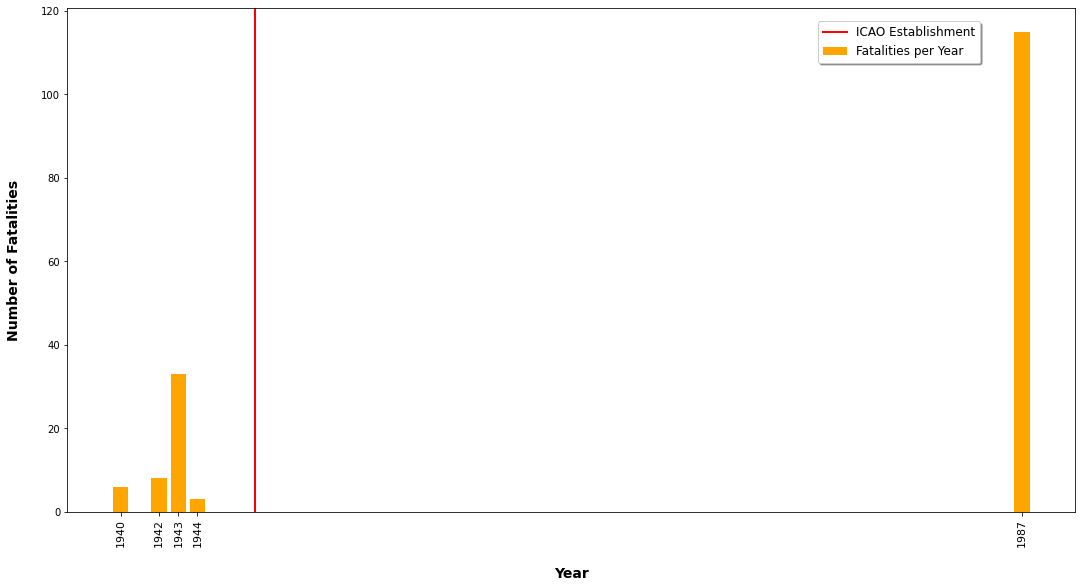

In [64]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_axes([1,1,1,1])
plt.bar(df_conflict_factors['year'], df_conflict_factors['total_fatalities'], label='Fatalities per Year', color='orange')
ax.axvline(1947, color='red', linewidth=2, label='ICAO Establishment', ymin=0, ymax=1, alpha=1)
plt.xlabel('Year', labelpad=20, fontsize=14, fontweight='bold')
plt.ylabel('Number of Fatalities', labelpad=20, fontsize=14, fontweight='bold')
plt.tick_params(axis='x', rotation=90)
plt.xticks(df_conflict_factors['year'], fontsize=11)
plt.legend(loc='upper center', bbox_to_anchor=(0.8250,0.985), shadow=True, ncol=1, fontsize=12)
plt.show()

### **B.** Crashing The Other Objects Factors

In [65]:
crashing_objects = df_com.loc[df_com['probable_causes'] == 'Crashing The Other Objects'].reset_index(drop=True)
crashing_objects

,date,locations,total_on_boards,total_fatalities,flight_types,probable_causes,year,total_survived,per_month
0,1940-03-01,"Gulf of Oman, All World",8,8,Scheduled Revenue Flight,Crashing The Other Objects,1940,0,1940-03
1,1985-06-23,"Atlantic Ocean, All World",329,329,Scheduled Revenue Flight,Crashing The Other Objects,1985,0,1985-06


In [66]:
df_crashing_objects = crashing_objects.groupby(['year'])['total_fatalities'].agg({'sum', 'count'}).reset_index()
df_crashing_objects.rename(columns={'count': 'total_accidents', 'sum': "total_fatalities"}, inplace=True)
df_crashing_objects

,year,total_accidents,total_fatalities
0,1940,1,8
1,1985,1,329


#### `Number of Accidents` per Year by Crashing The Other Objects Factors

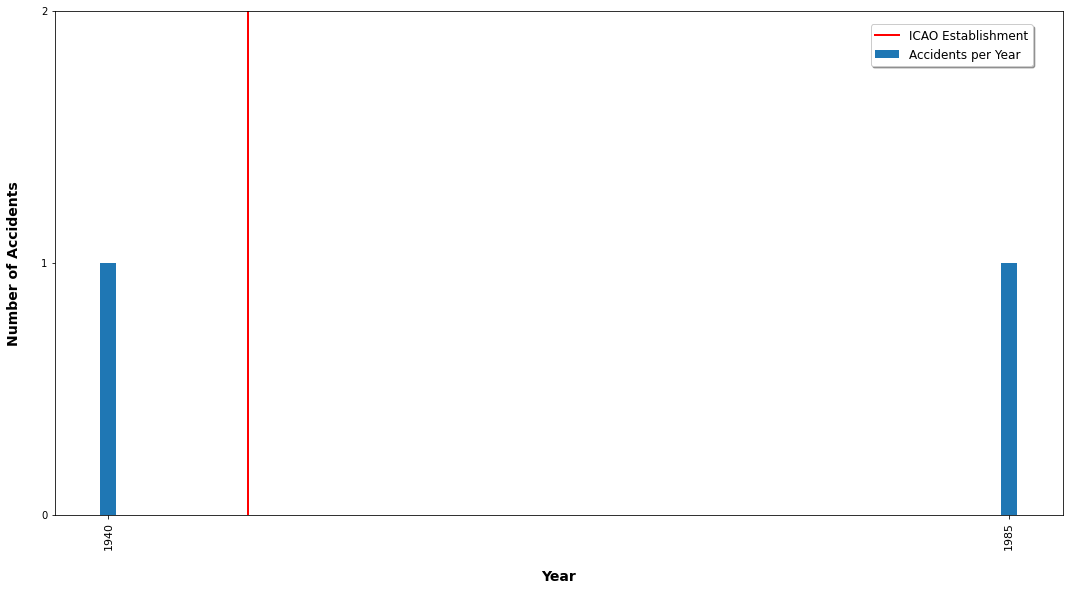

In [67]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_axes([1,1,1,1])
plt.bar(df_crashing_objects['year'], df_crashing_objects['total_accidents'], label='Accidents per Year')
ax.axvline(1947, color='red', linewidth=2, label='ICAO Establishment', ymin=0, ymax=1, alpha=1)
plt.xlabel('Year', labelpad=20, fontsize=14, fontweight='bold')
plt.ylabel('Number of Accidents', labelpad=20, fontsize=14, fontweight='bold')
plt.tick_params(axis='x', rotation=90)
plt.yticks(range(0,3))
plt.xticks(df_crashing_objects['year'], fontsize=11)
plt.legend(loc='upper center', bbox_to_anchor=(0.890,0.985), shadow=True, ncol=1, fontsize=12)
plt.show()

#### `Number of Fatalities` per Year by Crashing The Other Objects Factors

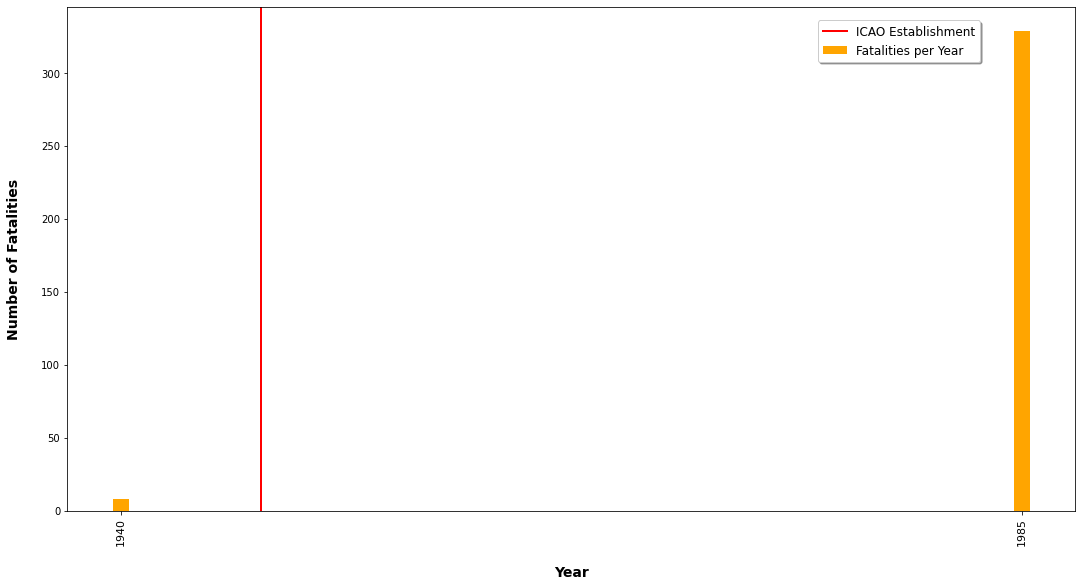

In [68]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_axes([1,1,1,1])
plt.bar(df_crashing_objects['year'], df_crashing_objects['total_fatalities'], color='orange', label='Fatalities per Year')
ax.axvline(1947, color='red', linewidth=2, label='ICAO Establishment', ymin=0, ymax=1, alpha=1)
plt.xlabel('Year', labelpad=20, fontsize=14, fontweight='bold')
plt.ylabel('Number of Fatalities', labelpad=20, fontsize=14, fontweight='bold')
plt.tick_params(axis='x', rotation=90)
plt.xticks(df_crashing_objects['year'], fontsize=11)
plt.legend(loc='upper center', bbox_to_anchor=(0.825,0.985), shadow=True, ncol=1, fontsize=12)
plt.show()

### **C.** Disappeared Without Trace Factors

In [69]:
dis_without_trace = df_com.loc[df_com['probable_causes'] == 'Disappeared Without Trace'].reset_index(drop=True)
dis_without_trace.head()

,date,locations,total_on_boards,total_fatalities,flight_types,probable_causes,year,total_survived,per_month
0,1926-05-31,"The Channel, All World",1,1,Postal,Disappeared Without Trace,1926,0,1926-05
1,1933-07-18,"Aegean Sea, All World",6,6,Scheduled Revenue Flight,Disappeared Without Trace,1933,0,1933-07
2,1936-02-15,"Atlantic Ocean, All World",4,4,Postal,Disappeared Without Trace,1936,0,1936-02
3,1941-01-10,"Mediterranean Sea, All World",16,16,Scheduled Revenue Flight,Disappeared Without Trace,1941,0,1941-01
4,1941-06-21,"Japan Sea, All World",18,18,Scheduled Revenue Flight,Disappeared Without Trace,1941,0,1941-06


In [70]:
dis_without_trace['total_fatalities'].sum()

643

In [71]:
df_dis_without_trace = dis_without_trace.groupby('year')['total_fatalities'].agg({'sum', 'count'}).reset_index()
df_dis_without_trace.rename(columns={'count': 'total_accidents', 'sum': "total_fatalities"}, inplace=True)
df_dis_without_trace

,year,total_accidents,total_fatalities
0,1926,1,1
1,1933,1,6
2,1936,1,4
3,1941,2,34
4,1944,2,13
5,1945,1,2
6,1946,1,10
7,1948,2,63
8,1949,1,20
9,1953,1,58


#### `Number of Accidents` per Year by Disappeated Without Trace Factors

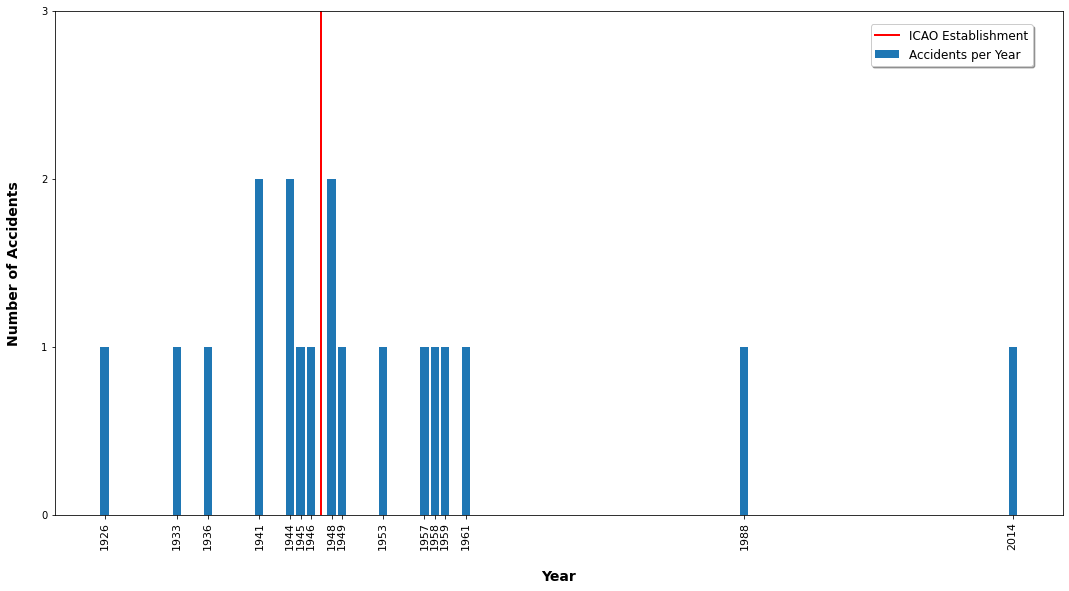

In [72]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_axes([1,1,1,1])
plt.bar(df_dis_without_trace['year'], df_dis_without_trace['total_accidents'], label='Accidents per Year')
ax.axvline(1947, color='red', linewidth=2, label='ICAO Establishment', ymin=0, ymax=1, alpha=1)
plt.xlabel('Year', labelpad=20, fontsize=14, fontweight='bold')
plt.ylabel('Number of Accidents', labelpad=20, fontsize=14, fontweight='bold')
plt.tick_params(axis='x', rotation=90)
plt.yticks(range(0,4))
plt.xticks(df_dis_without_trace['year'], fontsize=11)
plt.legend(loc='upper center', bbox_to_anchor=(0.890,0.985), shadow=True, ncol=1, fontsize=12)
plt.show()

#### `Number of Fatalities` per Year by Disappeated Without Trace Factors

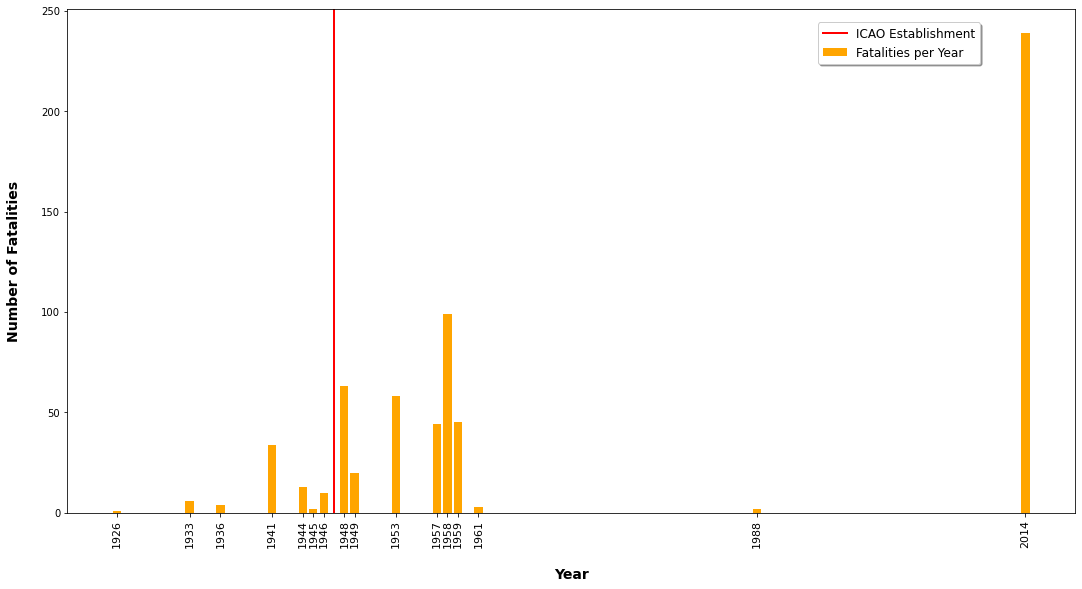

In [73]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_axes([1,1,1,1])
plt.bar(df_dis_without_trace['year'], df_dis_without_trace['total_fatalities'], color='orange', label='Fatalities per Year')
ax.axvline(1947, color='red', linewidth=2, label='ICAO Establishment', ymin=0, ymax=1, alpha=1)
plt.xlabel('Year', labelpad=20, fontsize=14, fontweight='bold')
plt.ylabel('Number of Fatalities', labelpad=20, fontsize=14, fontweight='bold')
plt.tick_params(axis='x', rotation=90)
plt.xticks(df_dis_without_trace['year'], fontsize=11)
plt.legend(loc='upper center', bbox_to_anchor=(0.825,0.985), shadow=True, ncol=1, fontsize=12)
plt.show()

### **D.** Technical Factors

In [115]:
tech_fac = df_com.loc[df_com['probable_causes'] == 'Technical Factors'].reset_index(drop=True)
tech_fac.head()

,date,locations,total_on_boards,total_fatalities,flight_types,probable_causes,year,total_survived,per_month
0,1923-09-15,"Mediterranean Sea, All World",0,0,Scheduled Revenue Flight,Technical Factors,1923,0,1923-09
1,1924-04-24,"North Sea, All World",3,3,Scheduled Revenue Flight,Technical Factors,1924,0,1924-04
2,1925-02-09,"Mediterranean Sea, All World",2,0,Postal,Technical Factors,1925,2,1925-02
3,1925-04-11,"Mediterranean Sea, All World",2,0,Postal,Technical Factors,1925,2,1925-04
4,1925-04-14,"Mediterranean Sea, All World",2,0,Postal,Technical Factors,1925,2,1925-04


In [116]:
df_tech_fac = tech_fac.groupby('year')['total_fatalities'].agg({'sum', 'count'}).reset_index()
df_tech_fac.rename(columns={'sum': 'total_fatalities', 'count': 'total_accidents'}, inplace=True)
df_tech_fac.head()

,year,total_accidents,total_fatalities
0,1923,1,0
1,1924,1,3
2,1925,4,0
3,1926,1,0
4,1929,3,0


#### `Number of Accidents` per Year by Technical Factors

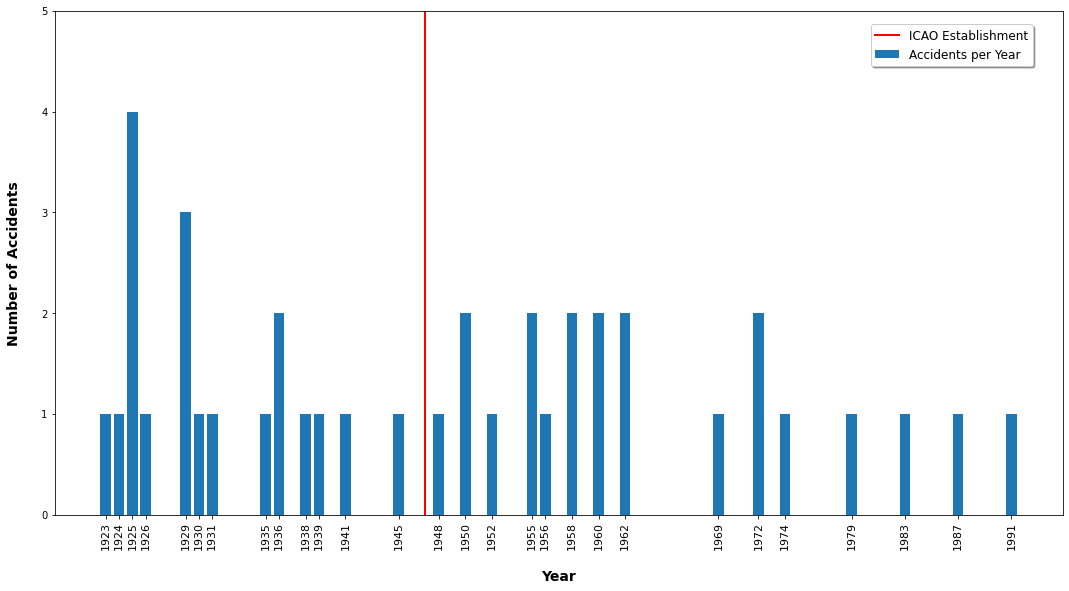

In [78]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_axes([1,1,1,1])
plt.bar(df_tech_fac['year'], df_tech_fac['total_accidents'], label='Accidents per Year')
ax.axvline(1947, color='red', linewidth=2, label='ICAO Establishment', ymin=0, ymax=1, alpha=1)
plt.xlabel('Year', labelpad=20, fontsize=14, fontweight='bold')
plt.ylabel('Number of Accidents', labelpad=20, fontsize=14, fontweight='bold')
plt.tick_params(axis='x', rotation=90)
plt.yticks(range(0,6))
plt.xticks(df_tech_fac['year'], fontsize=11)
plt.legend(loc='upper center', bbox_to_anchor=(0.890,0.985), shadow=True, ncol=1, fontsize=12)
plt.show()

#### `Number of Fatalities` per Year by Technical Factors

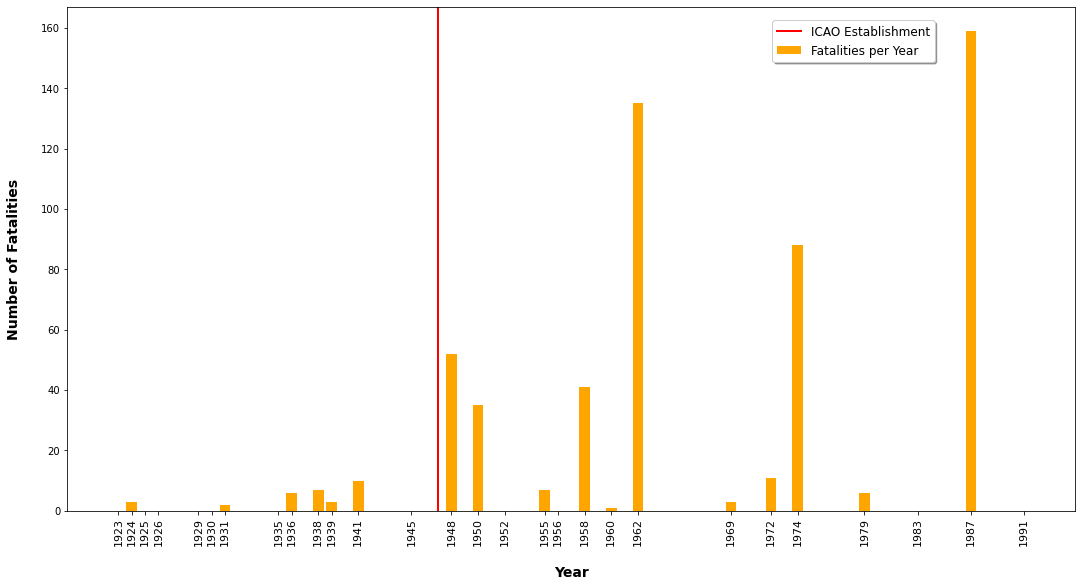

In [79]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_axes([1,1,1,1])
plt.bar(df_tech_fac['year'], df_tech_fac['total_fatalities'], color='orange', label='Fatalities per Year')
ax.axvline(1947, color='red', linewidth=2, label='ICAO Establishment', ymin=0, ymax=1, alpha=1)
plt.xlabel('Year', labelpad=20, fontsize=14, fontweight='bold')
plt.ylabel('Number of Fatalities', labelpad=20, fontsize=14, fontweight='bold')
plt.tick_params(axis='x', rotation=90)
plt.xticks(df_tech_fac['year'], fontsize=11)
plt.legend(loc='upper center', bbox_to_anchor=(0.78,0.985), shadow=True, ncol=1, fontsize=12)
plt.show()

### **E.** Poor Weather Factors

In [80]:
poor_weather = df_com.loc[df_com['probable_causes'] == 'Poor Weather'].reset_index(drop=True)
poor_weather.head()

,date,locations,total_on_boards,total_fatalities,flight_types,probable_causes,year,total_survived,per_month
0,1930-01-25,"Mediterranean Sea, All World",2,2,Postal,Poor Weather,1930,0,1930-01
1,1934-05-09,"The Channel, All World",6,6,Scheduled Revenue Flight,Poor Weather,1934,0,1934-05
2,1936-02-10,"Atlantic Ocean, All World",6,6,Scheduled Revenue Flight,Poor Weather,1936,0,1936-02
3,1938-02-13,"Mediterranean Sea, All World",14,14,Scheduled Revenue Flight,Poor Weather,1938,0,1938-02
4,1944-11-23,"The Channel, All World",4,4,Cargo,Poor Weather,1944,0,1944-11


In [83]:
df_poor_weather = poor_weather.groupby('year')['total_fatalities'].agg({'sum', 'count'}).reset_index()
df_poor_weather.rename(columns={'sum': 'total_fatalities', 'count': 'total_accidents'}, inplace=True)
df_poor_weather

,year,total_accidents,total_fatalities
0,1930,1,2
1,1934,1,6
2,1936,1,6
3,1938,1,14
4,1944,1,4
5,1948,1,2
6,1951,1,37
7,1952,1,17
8,1982,2,8
9,1992,1,3


#### `Number of Accidents` per Year by Poor Weather Factors

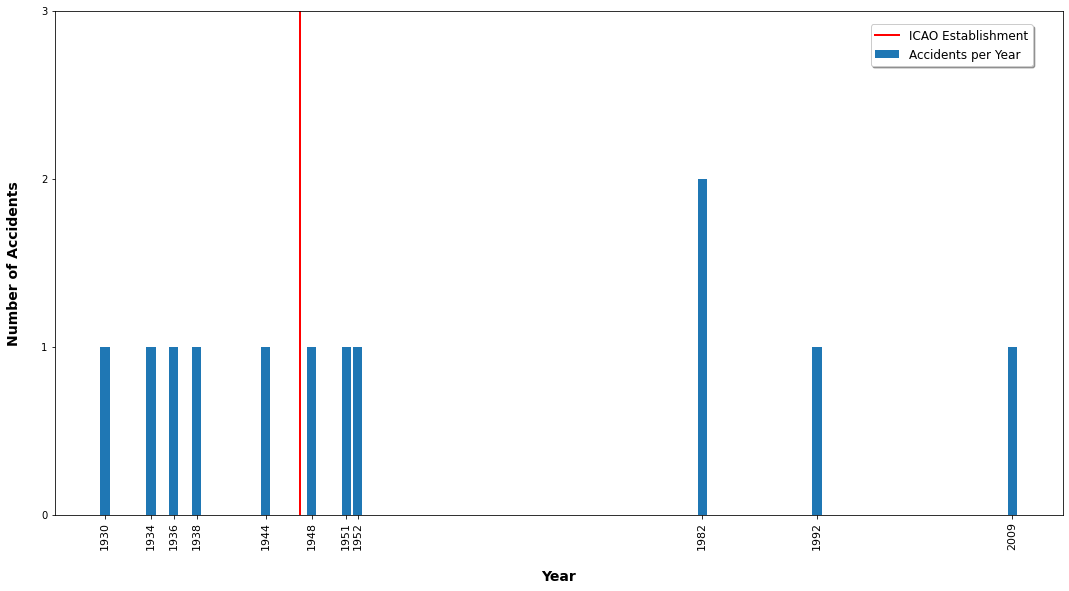

In [84]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_axes([1,1,1,1])
plt.bar(df_poor_weather['year'], df_poor_weather['total_accidents'], label='Accidents per Year')
ax.axvline(1947, color='red', linewidth=2, label='ICAO Establishment', ymin=0, ymax=1, alpha=1)
plt.xlabel('Year', labelpad=20, fontsize=14, fontweight='bold')
plt.ylabel('Number of Accidents', labelpad=20, fontsize=14, fontweight='bold')
plt.tick_params(axis='x', rotation=90)
plt.yticks(range(0,4))
plt.xticks(df_poor_weather['year'], fontsize=11)
plt.legend(loc='upper center', bbox_to_anchor=(0.890,0.985), shadow=True, ncol=1, fontsize=12)
plt.show()

#### `Number of Fatalities` per Year by Poor Weather Factors

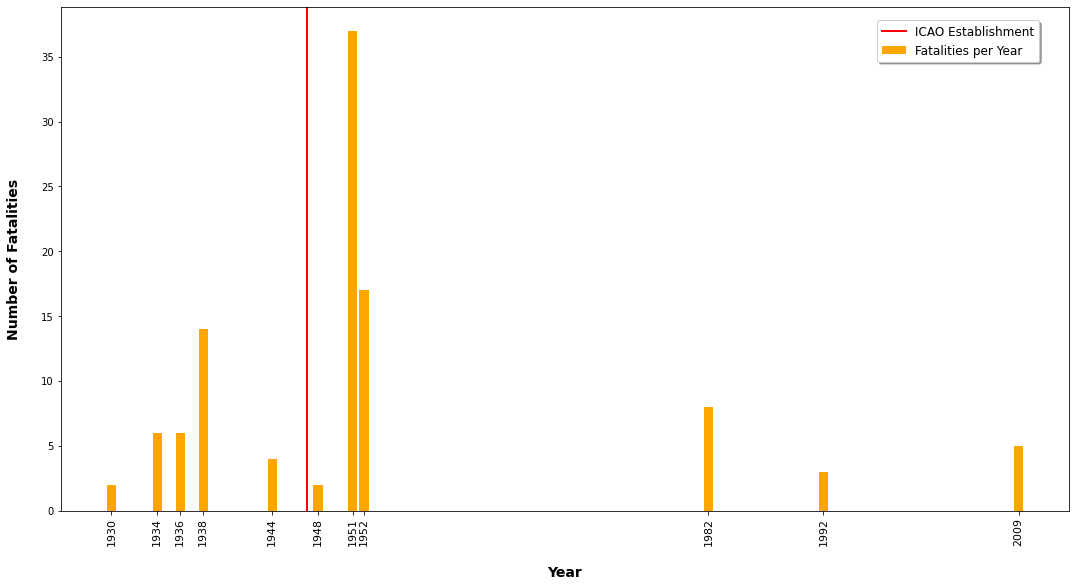

In [85]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_axes([1,1,1,1])
plt.bar(df_poor_weather['year'], df_poor_weather['total_fatalities'], label='Fatalities per Year', color='orange')
ax.axvline(1947, color='red', linewidth=2, label='ICAO Establishment', ymin=0, ymax=1, alpha=1)
plt.xlabel('Year', labelpad=20, fontsize=14, fontweight='bold')
plt.ylabel('Number of Fatalities', labelpad=20, fontsize=14, fontweight='bold')
plt.tick_params(axis='x', rotation=90)
plt.xticks(df_poor_weather['year'], fontsize=11)
plt.legend(loc='upper center', bbox_to_anchor=(0.890,0.985), shadow=True, ncol=1, fontsize=12)
plt.show()

### **F.** Human Errors Factors

In [86]:
human_err = df_com.loc[df_com['probable_causes'] == 'Human Errors'].reset_index(drop=True)
human_err

,date,locations,total_on_boards,total_fatalities,flight_types,probable_causes,year,total_survived,per_month
0,1930-03-05,"Mediterranean Sea, All World",3,0,Postal,Human Errors,1930,3,1930-03
1,1931-09-13,"Atlantic Ocean, All World",3,0,Postal,Human Errors,1931,3,1931-09
2,1938-07-14,"Tyrrhenian Sea, All World",20,20,Scheduled Revenue Flight,Human Errors,1938,0,1938-07
3,1938-07-29,"Pacific Ocean, All World",15,15,Scheduled Revenue Flight,Human Errors,1938,0,1938-07
4,1947-10-14,"Atlantic Ocean, All World",69,0,Charter / Taxi,Human Errors,1947,69,1947-10
5,1953-02-02,"Atlantic Ocean, All World",39,39,Charter / Taxi,Human Errors,1953,0,1953-02
6,1986-12-17,"Caribbean Sea, All World",3,0,Cargo,Human Errors,1986,3,1986-12
7,1999-10-31,"Atlantic Ocean, All World",217,217,Scheduled Revenue Flight,Human Errors,1999,0,1999-10


In [87]:
df_human_err = human_err.groupby('year')['total_fatalities'].agg({'sum', 'count'}).reset_index()
df_human_err.rename(columns={'sum': 'total_fatalities', 'count': 'total_accidents'}, inplace=True)
df_human_err

,year,total_accidents,total_fatalities
0,1930,1,0
1,1931,1,0
2,1938,2,35
3,1947,1,0
4,1953,1,39
5,1986,1,0
6,1999,1,217


#### `Number of Accidents` per Year by Human Error Factors

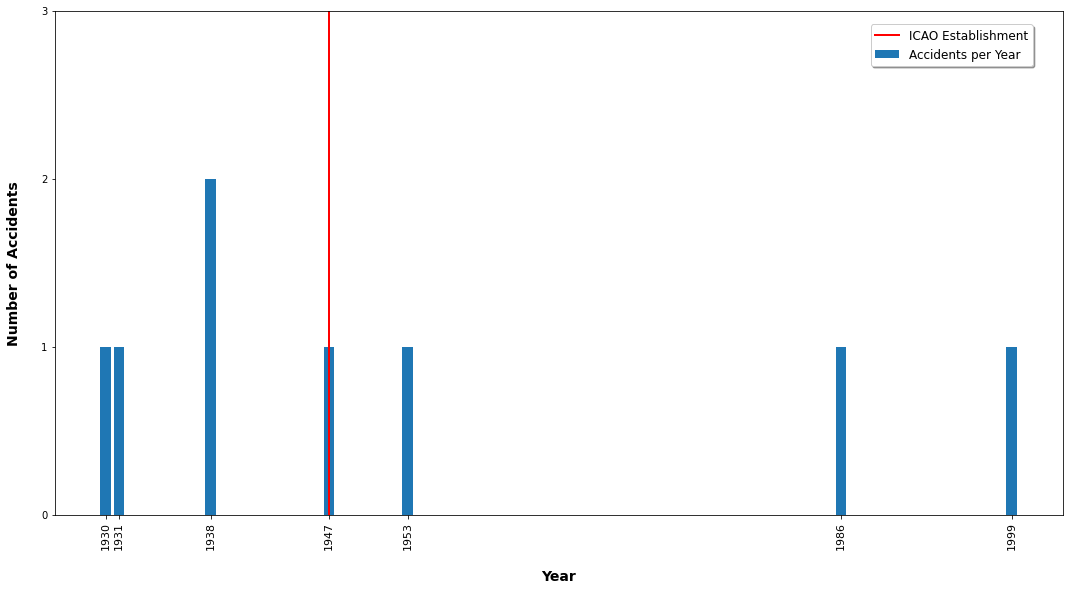

In [88]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_axes([1,1,1,1])
plt.bar(df_human_err['year'], df_human_err['total_accidents'], label='Accidents per Year')
ax.axvline(1947, color='red', linewidth=2, label='ICAO Establishment', ymin=0, ymax=1, alpha=1)
plt.xlabel('Year', labelpad=20, fontsize=14, fontweight='bold')
plt.ylabel('Number of Accidents', labelpad=20, fontsize=14, fontweight='bold')
plt.tick_params(axis='x', rotation=90)
plt.yticks(range(0,4))
plt.xticks(df_human_err['year'], fontsize=11)
plt.legend(loc='upper center', bbox_to_anchor=(0.890,0.985), shadow=True, ncol=1, fontsize=12)
plt.show()

#### `Number of Fatalities` per Year by Human Error Factors

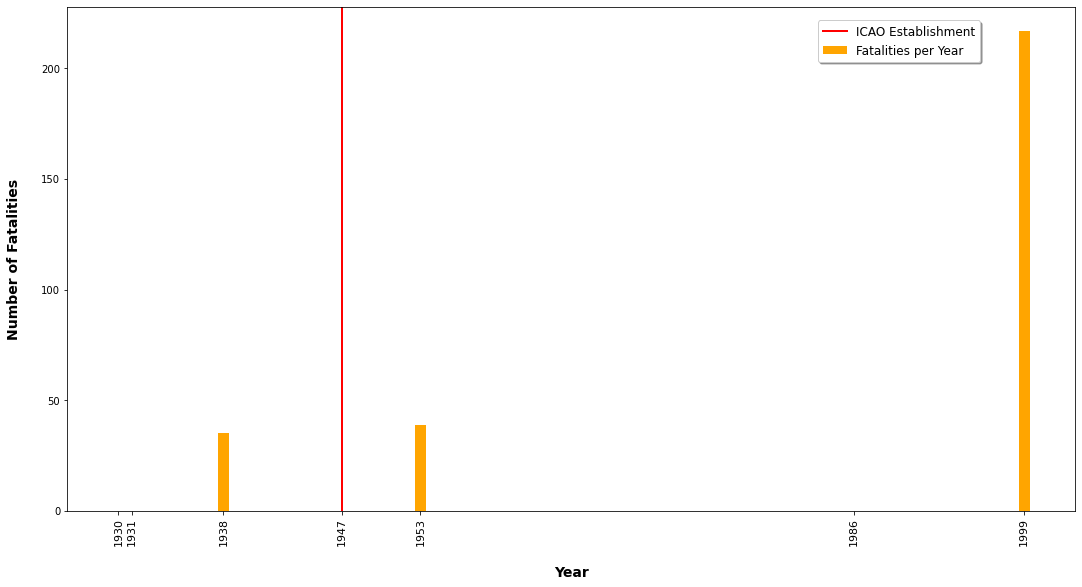

In [89]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_axes([1,1,1,1])
plt.bar(df_human_err['year'], df_human_err['total_fatalities'], label='Fatalities per Year', color='orange')
ax.axvline(1947, color='red', linewidth=2, label='ICAO Establishment', ymin=0, ymax=1, alpha=1)
plt.xlabel('Year', labelpad=20, fontsize=14, fontweight='bold')
plt.ylabel('Number of Fatalities', labelpad=20, fontsize=14, fontweight='bold')
plt.tick_params(axis='x', rotation=90)
plt.xticks(df_human_err['year'], fontsize=11)
plt.legend(loc='upper center', bbox_to_anchor=(0.825,0.985), shadow=True, ncol=1, fontsize=12)
plt.show()

### 5. Number of Accidents and Fatalities per Year from (1918-2020) by Flight Types

In [90]:
df_com['flight_types'].unique()

array(['Scheduled Revenue Flight', 'Postal', 'Cargo', 'Charter / Taxi'],
      dtype=object)

### A. Scheduled Revenue Flight

In [91]:
scheduled = df_com.loc[df_com['flight_types'] == 'Scheduled Revenue Flight'].reset_index(drop=True)
scheduled.head()

,date,locations,total_on_boards,total_fatalities,flight_types,probable_causes,year,total_survived,per_month
0,1923-09-15,"Mediterranean Sea, All World",0,0,Scheduled Revenue Flight,Technical Factors,1923,0,1923-09
1,1924-04-24,"North Sea, All World",3,3,Scheduled Revenue Flight,Technical Factors,1924,0,1924-04
2,1926-10-21,"The Channel, All World",12,0,Scheduled Revenue Flight,Technical Factors,1926,12,1926-10
3,1929-09-10,"Baltic Sea, All World",0,0,Scheduled Revenue Flight,Technical Factors,1929,0,1929-09
4,1933-07-18,"Aegean Sea, All World",6,6,Scheduled Revenue Flight,Disappeared Without Trace,1933,0,1933-07


In [94]:
df_scheduled = scheduled.groupby('year')['total_fatalities'].agg({'sum', 'count'}).reset_index()
df_scheduled.rename(columns={'sum': 'total_fatalities', 'count': 'total_accidents'}, inplace=True)
df_scheduled.head()

,year,total_accidents,total_fatalities
0,1923,1,0
1,1924,1,3
2,1926,1,0
3,1929,1,0
4,1933,1,6


#### `Number of Accidents` per Year by Scheduled Revenue Flight

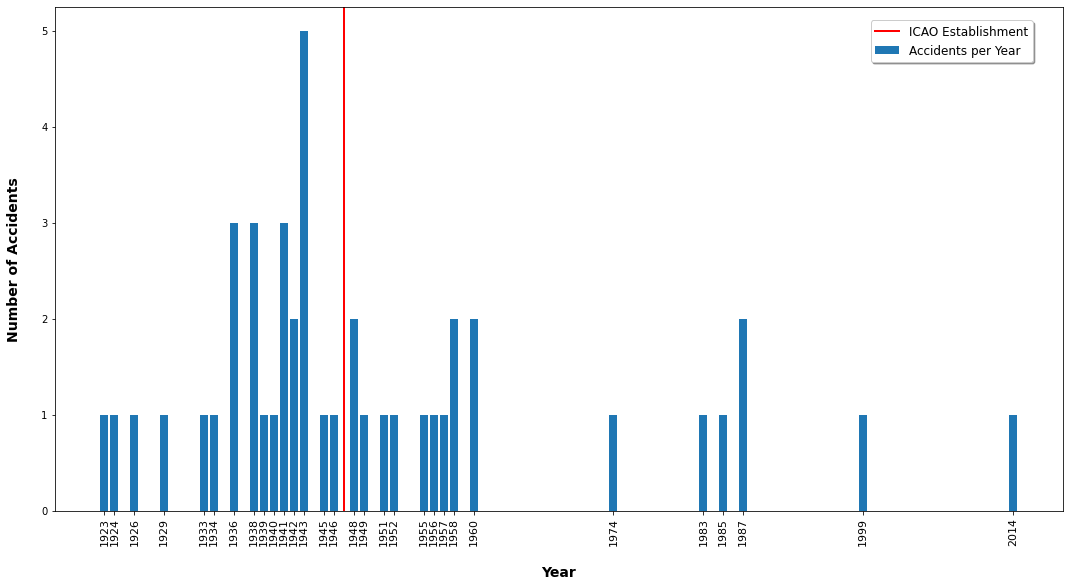

In [95]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_axes([1,1,1,1])
plt.bar(df_scheduled['year'], df_scheduled['total_accidents'], label='Accidents per Year')
ax.axvline(1947, color='red', linewidth=2, label='ICAO Establishment', ymin=0, ymax=1, alpha=1)
plt.xlabel('Year', labelpad=20, fontsize=14, fontweight='bold')
plt.ylabel('Number of Accidents', labelpad=20, fontsize=14, fontweight='bold')
plt.tick_params(axis='x', rotation=90)
plt.xticks(df_scheduled['year'], fontsize=11)
plt.legend(loc='upper center', bbox_to_anchor=(0.890,0.985), shadow=True, ncol=1, fontsize=12)
plt.show()

#### `Number of Fatalities` per Year by Scheduled Revenue Flight

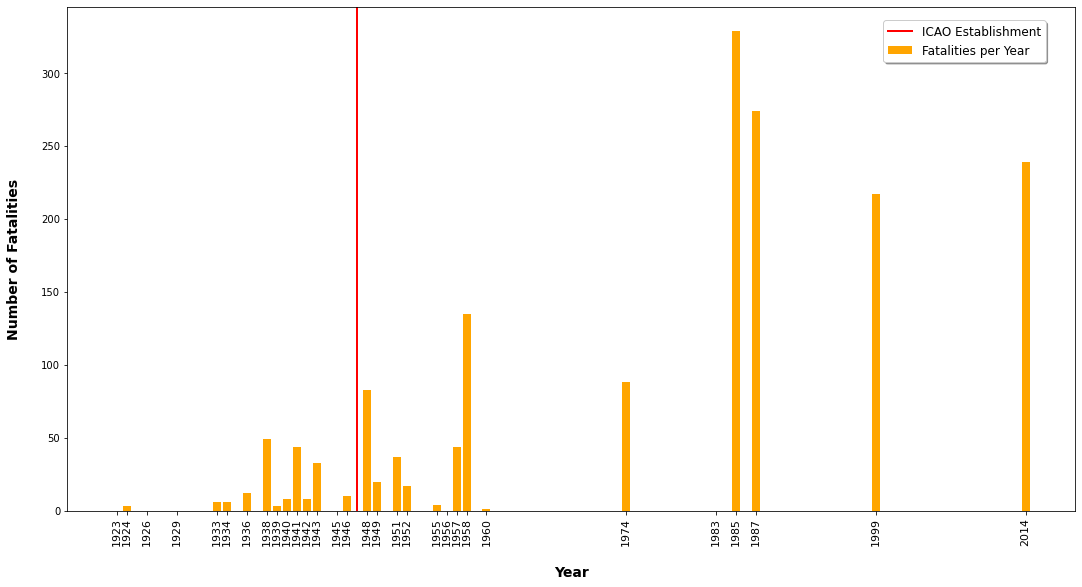

In [96]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_axes([1,1,1,1])
plt.bar(df_scheduled['year'], df_scheduled['total_fatalities'], color='orange', label='Fatalities per Year')
ax.axvline(1947, color='red', linewidth=2, label='ICAO Establishment', ymin=0, ymax=1, alpha=1)
plt.xlabel('Year', labelpad=20, fontsize=14, fontweight='bold')
plt.ylabel('Number of Fatalities', labelpad=20, fontsize=14, fontweight='bold')
plt.tick_params(axis='x', rotation=90)
plt.xticks(df_scheduled['year'], fontsize=11)
plt.legend(loc='upper center', bbox_to_anchor=(0.890,0.985), shadow=True, ncol=1, fontsize=12)
plt.show()

### B. Postal Flight

In [97]:
postal = df_com.loc[df_com['flight_types'] == 'Postal'].reset_index(drop=True)
postal.head()

,date,locations,total_on_boards,total_fatalities,flight_types,probable_causes,year,total_survived,per_month
0,1925-02-09,"Mediterranean Sea, All World",2,0,Postal,Technical Factors,1925,2,1925-02
1,1925-04-11,"Mediterranean Sea, All World",2,0,Postal,Technical Factors,1925,2,1925-04
2,1925-04-14,"Mediterranean Sea, All World",2,0,Postal,Technical Factors,1925,2,1925-04
3,1925-12-19,"Mediterranean Sea, All World",2,0,Postal,Technical Factors,1925,2,1925-12
4,1926-05-31,"The Channel, All World",1,1,Postal,Disappeared Without Trace,1926,0,1926-05


In [100]:
df_postal = postal.groupby('year')['total_fatalities'].agg({'sum', 'count'}).reset_index()
df_postal.rename(columns={'sum': 'total_fatalities', 'count': 'total_accidents'}, inplace=True)
df_postal

,year,total_accidents,total_fatalities
0,1925,4,0
1,1926,1,1
2,1929,2,0
3,1930,3,2
4,1931,2,2
5,1936,1,4
6,1938,1,7
7,1940,1,6
8,1944,2,13


#### `Number of Accidents` per Year by Postal Flight

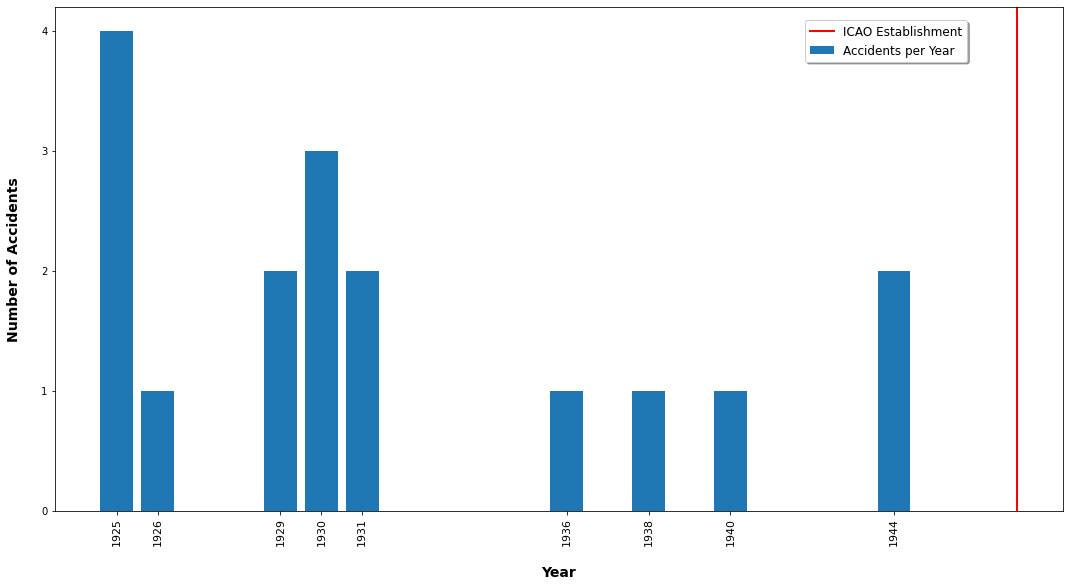

In [101]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_axes([1,1,1,1])
plt.bar(df_postal['year'], df_postal['total_accidents'], label='Accidents per Year')
ax.axvline(1947, color='red', linewidth=2, label='ICAO Establishment', ymin=0, ymax=1, alpha=1)
plt.xlabel('Year', labelpad=20, fontsize=14, fontweight='bold')
plt.ylabel('Number of Accidents', labelpad=20, fontsize=14, fontweight='bold')
plt.tick_params(axis='x', rotation=90)
plt.yticks(range(0,5))
plt.xticks(df_postal['year'], fontsize=11)
plt.legend(loc='upper center', bbox_to_anchor=(0.825,0.985), shadow=True, ncol=1, fontsize=12)
plt.show()

#### `Number of Fatalities` per Year by Postal Flight

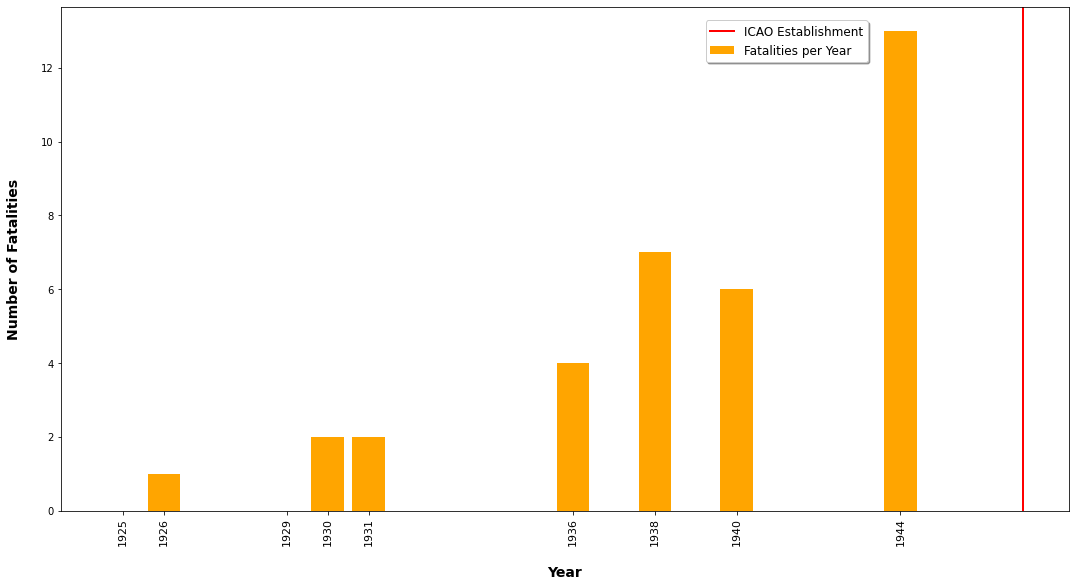

In [102]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_axes([1,1,1,1])
plt.bar(df_postal['year'], df_postal['total_fatalities'], label='Fatalities per Year', color='orange')
ax.axvline(1947, color='red', linewidth=2, label='ICAO Establishment', ymin=0, ymax=1, alpha=1)
plt.xlabel('Year', labelpad=20, fontsize=14, fontweight='bold')
plt.ylabel('Number of Fatalities', labelpad=20, fontsize=14, fontweight='bold')
plt.tick_params(axis='x', rotation=90)
plt.xticks(df_postal['year'], fontsize=11)
plt.legend(loc='upper center', bbox_to_anchor=(0.720,0.985), shadow=True, ncol=1, fontsize=12)
plt.show()

### C. Cargo Flight

In [103]:
cargo = df_com.loc[df_com['flight_types'] == 'Cargo'].reset_index(drop=True)
cargo.head()

,date,locations,total_on_boards,total_fatalities,flight_types,probable_causes,year,total_survived,per_month
0,1935-05-11,"The Channel, All World",2,0,Cargo,Technical Factors,1935,2,1935-05
1,1944-11-23,"The Channel, All World",4,4,Cargo,Poor Weather,1944,0,1944-11
2,1945-08-26,"Coral Sea, All World",2,2,Cargo,Disappeared Without Trace,1945,0,1945-08
3,1950-02-02,"North Sea, All World",7,7,Cargo,Technical Factors,1950,0,1950-02
4,1955-09-23,"Pacific Ocean, All World",5,3,Cargo,Technical Factors,1955,2,1955-09


In [106]:
df_cargo = cargo.groupby('year')['total_fatalities'].agg({'sum', 'count'}).reset_index()
df_cargo.rename(columns={'sum': 'total_fatalities', 'count': 'total_accidents'}, inplace=True)
df_cargo

,year,total_accidents,total_fatalities
0,1935,1,0
1,1944,1,4
2,1945,1,2
3,1950,1,7
4,1955,1,3
5,1958,1,5
6,1961,1,3
7,1969,1,3
8,1979,1,6
9,1986,1,0


#### `Number of Accidents` per Year by Cargo Flight

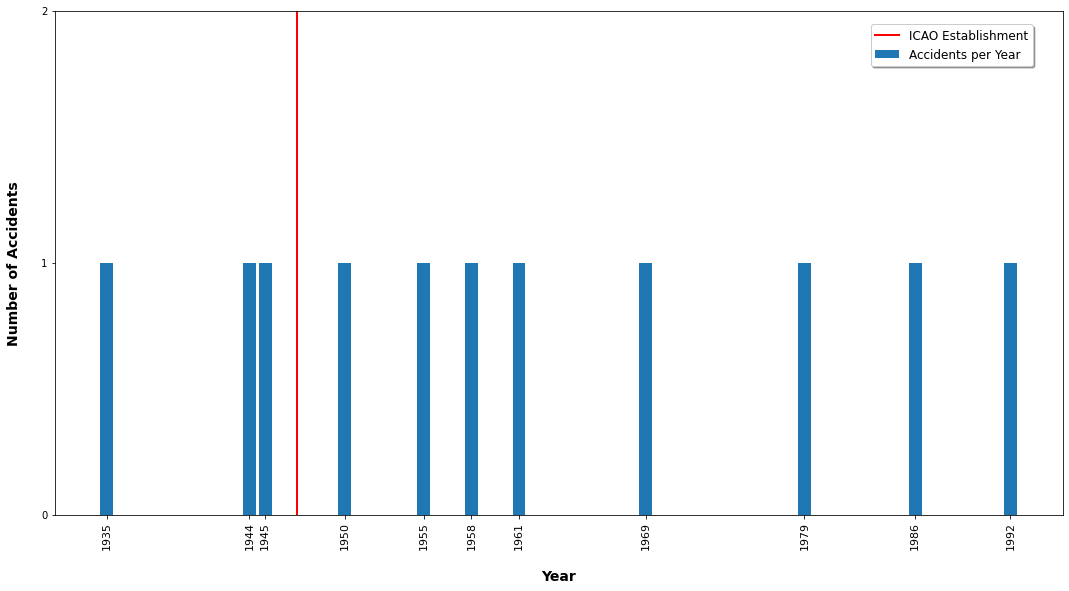

In [107]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_axes([1,1,1,1])
plt.bar(df_cargo['year'], df_cargo['total_accidents'], label='Accidents per Year')
ax.axvline(1947, color='red', linewidth=2, label='ICAO Establishment', ymin=0, ymax=1, alpha=1)
plt.xlabel('Year', labelpad=20, fontsize=14, fontweight='bold')
plt.ylabel('Number of Accidents', labelpad=20, fontsize=14, fontweight='bold')
plt.tick_params(axis='x', rotation=90)
plt.yticks(range(0,3))
plt.xticks(df_cargo['year'], fontsize=11)
plt.legend(loc='upper center', bbox_to_anchor=(0.890,0.985), shadow=True, ncol=1, fontsize=12)
plt.show()

#### `Number of Fatalities` per Year by Cargo Flight

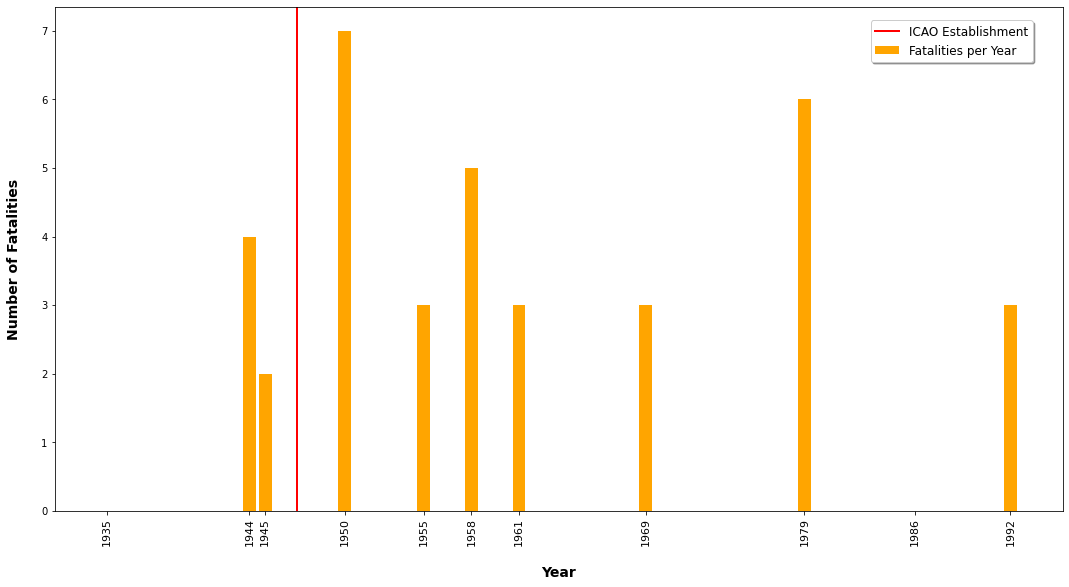

In [108]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_axes([1,1,1,1])
plt.bar(df_cargo['year'], df_cargo['total_fatalities'], label='Fatalities per Year', color='orange')
ax.axvline(1947, color='red', linewidth=2, label='ICAO Establishment', ymin=0, ymax=1, alpha=1)
plt.xlabel('Year', labelpad=20, fontsize=14, fontweight='bold')
plt.ylabel('Number of Fatalities', labelpad=20, fontsize=14, fontweight='bold')
plt.tick_params(axis='x', rotation=90)
plt.xticks(df_cargo['year'], fontsize=11)
plt.legend(loc='upper center', bbox_to_anchor=(0.890,0.985), shadow=True, ncol=1, fontsize=12)
plt.show()

### D. Charter / Taxi Flights

In [109]:
charter_taxi = df_com.loc[df_com['flight_types'] == 'Charter / Taxi'].reset_index(drop=True)
charter_taxi.head()

,date,locations,total_on_boards,total_fatalities,flight_types,probable_causes,year,total_survived,per_month
0,1944-12-15,"The Channel, All World",3,3,Charter / Taxi,Conflict Factors,1944,0,1944-12
1,1947-10-14,"Atlantic Ocean, All World",69,0,Charter / Taxi,Human Errors,1947,69,1947-10
2,1948-02-27,"Mediterranean Sea, All World",2,2,Charter / Taxi,Poor Weather,1948,0,1948-02
3,1948-12-28,"Gulf of Mexico, All World",32,32,Charter / Taxi,Disappeared Without Trace,1948,0,1948-12
4,1950-06-05,"Sargasso Sea, All World",65,28,Charter / Taxi,Technical Factors,1950,37,1950-06


In [111]:
df_charter_taxi = charter_taxi.groupby('year')['total_fatalities'].agg({'sum', 'count'}).reset_index()
df_charter_taxi.rename(columns={'sum': 'total_fatalities', 'count': 'total_accidents'}, inplace=True)
df_charter_taxi

,year,total_accidents,total_fatalities
0,1944,1,3
1,1947,1,0
2,1948,2,34
3,1950,1,28
4,1952,1,0
5,1953,2,97
6,1959,1,45
7,1962,2,135
8,1972,2,11
9,1982,2,8


#### `Number of Accidents` per Year by Charter / Taxi Flight

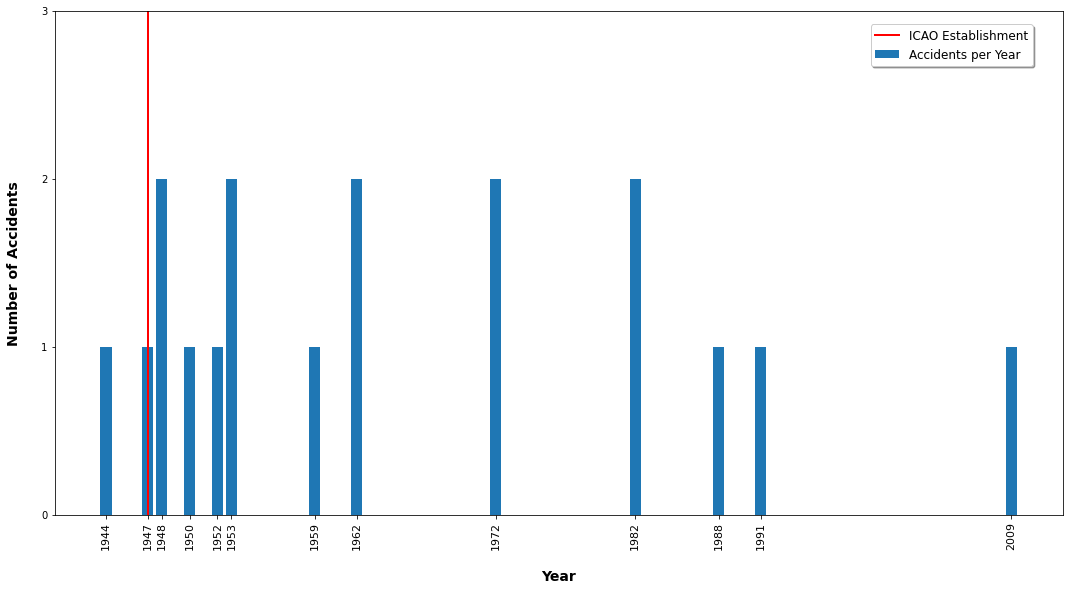

In [112]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_axes([1,1,1,1])
plt.bar(df_charter_taxi['year'], df_charter_taxi['total_accidents'], label='Accidents per Year')
ax.axvline(1947, color='red', linewidth=2, label='ICAO Establishment', ymin=0, ymax=1, alpha=1)
plt.xlabel('Year', labelpad=20, fontsize=14, fontweight='bold')
plt.ylabel('Number of Accidents', labelpad=20, fontsize=14, fontweight='bold')
plt.tick_params(axis='x', rotation=90)
plt.yticks(range(0,4))
plt.xticks(df_charter_taxi['year'], fontsize=11)
plt.legend(loc='upper center', bbox_to_anchor=(0.890,0.985), shadow=True, ncol=1, fontsize=12)
plt.show()

#### `Number of Fatalities` per year by Charter / Taxi Flight

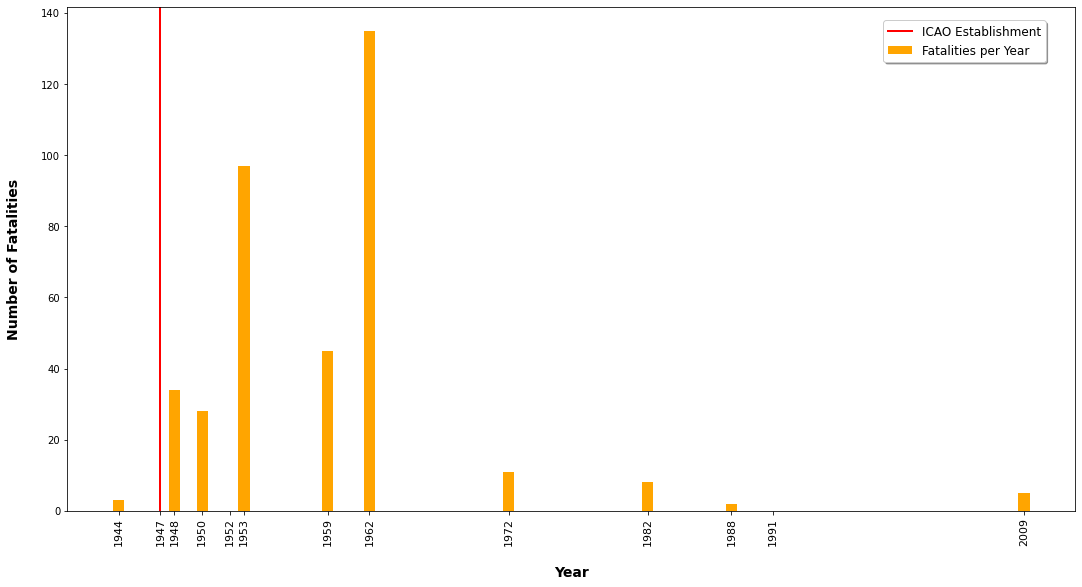

In [113]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_axes([1,1,1,1])
plt.bar(df_charter_taxi['year'], df_charter_taxi['total_fatalities'], label='Fatalities per Year', color='orange')
ax.axvline(1947, color='red', linewidth=2, label='ICAO Establishment', ymin=0, ymax=1, alpha=1)
plt.xlabel('Year', labelpad=20, fontsize=14, fontweight='bold')
plt.ylabel('Number of Fatalities', labelpad=20, fontsize=14, fontweight='bold')
plt.tick_params(axis='x', rotation=90)
plt.xticks(df_charter_taxi['year'], fontsize=11)
plt.legend(loc='upper center', bbox_to_anchor=(0.890,0.985), shadow=True, ncol=1, fontsize=12)
plt.show()

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Results

<p style='line-height:2.5rem; text-align: justify; text-indent: 30px'>After analyzing the BAAA worldwide aircraft accidents from 1918-2020 using descriptive statistics, i found that all of the quantiative variabeles that i used had a skewed data distribution type, which means that they have outlier values inside them. Then, i could see how many outliers from each of them using boxplot visualization on measures of dispersion process. It showed that total fatalities variable have more outliers than years variable, which mean that there are many different number of fatalities in our data. After that, i used skewness to measure how different the data distribution curve is from the normal data distribution curve, whereas kurtosis is used to indicate the peak value of the data distribution curve and the thickness of the curve tail. From the results of skewness calculation, it was obtained that years variable have a type of data distri-bution curve moderately skewed, and the direction of the distribution curve tends to be tilted to the right (positive skewed). While the variable total fatalities have a type of data distribution curve highly skewed, and the direction of the distribution curve also tends to be tilted to the right (positive skewed). Then based on the kurtosis value, it was known that the years variable has a platykurtic data distribution form, with a light-tailed tailed curve and outliers with a small amount. While the years variable has a form of leptokurtic data distribution, with a thick curve tail (heavy-tailed) and out-liers with a large amount. From this, we can say that all of the measurements that i used produce the same analysis results.</p>

<p style='line-height: 2.5rem; text-align: justify; text-indent: 30px'>Furthermore, i was describing the variables with qualitative data types, which are probable causes and flight types. After calculating the frequency of occurrence in each category of causes of accidents, it was found that the category of causes of accidents that most often appear in the data is technical factors as many as 40 times, while the category of causes of accidents that appear the least in the data is crashing the other objects as many as 2 times. In addition, from the percentages diagram of category of cause of accidents, it can be seen that technical factors have the highest percentage of 44.0%, followed by disappeared without trace by 20.9%, poor weather by 13.2%, conflict factors by 11.0%, human errors by 8.8%, and crashing the other objects with the lowest percentage of 2.2%.
Besides, the category of commercial flight types that most often appear in the data is scheduled revenue flight as many as 45 times, while the least is cargo flight as many as 11 times. And from the percentages visualization through the pie chart above, it can be seen that the scheduled revenue flight have the highest percentage of 49.5%, followed by charter / taxi flight by 19.8%, postal flight with 18.7%, and cargo flight with 12.1%.</p>

<p style='text-align:justify; line-height: 2.5rem; text-indent: 30px'>In the analysis of the number of accidents and fatalities per year, it was found that the graph of commercial aircraft accidents decreased in the period 1948 - 2020 after the establishment of the ICAO. In addition, the density of the chart also suf-fered a stretch after the formation of ICAO, which means that after the establish-ment of ICAO, commercial aircraft accidents do not always occur every year. This is in contrast to the graph of fatalities caused by commercial aircraft accidents, where in the period 1918 - 1947 which had more accident cases, but had a lesser number of fatalities than in the period 1948 - 2020 which actually had smaller number of acci-dents. These phenomena occur as the evolution of the aircraft itself. The increasing number of years, the more people's needs about aviation are also higher per year, so that the aviation industry around the world always make a change to meet the demands of the people, especially on the size of an aircraft. The decrement in the graph of the number of accidents in the period 1918 - 1947 or after the estab-lishment of the ICAO can occur due to improvements and innovations to safety systems, technology, and design in aircraft carried out by each aviation industry. As it is known that ICAO has a duty to standardize aviation safety rules and regula-tions, so as to ensure flight safety and the growth of regular civil aviation around the world. Then the graph of the increment in the number of fatalities per year caused by commercial aircraft also occurs due to the evolution of the size of an aircraft. Since 1960, international travel has become increasingly popular, resulting in signifi-cantly increased passenger volume. Therefore, aircraft manufacturers around the world are evolution of their aircraft sizes to accommodate this significantly increased passenger volume. Until 1969, a jumbo jet was built by Boeing, under the name Boe-ing 747. The jumbo jet can certainly carry more passengers than a regular jet. But, of course in each of these changes have their own consequences. The evolution of the size of commercial aircraft certainly provides an advantage, which can carry a larger number of passengers. But the consequence is that when there is an accident on a commercial aircraft, the number of fatalities resulting will also be more. Like in 1985, there was only one accident, but the number of fatalities produced was much higher than in other categories of the year with a higher number of accidents.</p>